# Name: Daniel Hall
### Date: 8/26/2023

<style>
.jp-Notebook {
    padding: var(--jp-notebook-padding);
    margin-left: 160px;
    outline: none;
    overflow: auto;
    background: var(--jp-layout-color0);
}
</style>

<img src="https://cdn.nba.com/logos/nba/1610612760/primary/L/logo.svg" alt="logo" style="position: fixed; top: -40px; left: 5px; height: 250px;">

# Introduction  

The purpose of this project is to gauge your technical skills and problem solving ability by working through something similar to a real NBA data science project. You will work your way through this jupyter notebook, answering questions as you go along. Please begin by adding your name to the top markdown chunk in this document. When you're finished with the document, come back and type your answers into the answer key at the top. Please leave all your work below and have your answers where indicated below as well. Please note that we will be reviewing your code so make it clear, concise and avoid long printouts. Feel free to add in as many new code chunks as you'd like.

Remember that we will be grading the quality of your code and visuals alongside the correctness of your answers. Please try to use packages like pandas/numpy and matplotlib/seaborn as much as possible (instead of base python data manipulations and explicit loops.)  

**WARNING:** Your project will **ONLY** be graded if it's knit to an HTML document where we can see your code. Be careful to make sure that any long lines of code appropriately visibly wrap around visibly to the next line, as code that's cut off from the side of the document cannot be graded.  

**Note:**    

**Throughout this document, any `season` column represents the year each season started. For example, the 2015-16 season will be in the dataset as 2015. For most of the rest of the project, we will refer to a season by just this number (e.g. 2015) instead of the full text (e.g. 2015-16).** 

# Answers  

## Part 1      

**Question 1:**   

- 1st Team: 26.7 points per game  
- 2nd Team: 23.9 points per game  
- 3rd Team: 21.8 points per game  
- All-Star: 22.2 points per game   

**Question 2:** 6.6 Years  

**Question 3:** 

- Elite: 2 players.  
- All-Star: 1 players.  
- Starter: 17 players.  
- Rotation: 9 players.  
- Roster: 49 players.  
- Out of League: 0 players.  

**Open Ended Modeling Question:** Please show your work and leave all responses below in the document.


## Part 2  

**Question 1:** 28.09%   
**Question 2:** Written question, put answer below in the document.    
**Question 3:** Written question, put answer below in the document.    
  


# Setup and Data    

In [309]:
import pandas as pd
pd.set_option('display.max_columns',None)
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows", None)
import numpy as np
from random import sample
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")
from pandas.api.types import CategoricalDtype



awards_df = pd.read_csv("Downloads/awards_data.csv")
player_df = pd.read_csv("Downloads/player_stats.csv")
team_df = pd.read_csv("Downloads/team_stats.csv")
rebound_df = pd.read_csv("Downloads/team_rebounding_data_22.csv")

## Part 1 -- Awards  

In this section, you're going to work with data relating to player awards and statistics. You'll start with some data manipulation questions and work towards building a model to predict broad levels of career success.  


### Question 1  

**QUESTION:** What is the average number of points per game for players in the 2007-2021 seasons who won All NBA First, Second, and Third teams (**not** the All Defensive Teams), as well as for players who were in the All-Star Game (**not** the rookie all-star game)?


 

In [310]:
awards_df.head()

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,Player Of The Month,Player Of The Week,Rookie Of The Month,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN


In [311]:
awards_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4329 entries, 0 to 4328
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   season                           4329 non-null   int64  
 1   nbapersonid                      4321 non-null   float64
 2   All NBA Defensive First Team     693 non-null    float64
 3   All NBA Defensive Second Team    693 non-null    float64
 4   All NBA First Team               693 non-null    float64
 5   All NBA Second Team              693 non-null    float64
 6   All NBA Third Team               693 non-null    float64
 7   All Rookie First Team            693 non-null    float64
 8   All Rookie Second Team           693 non-null    float64
 9   Bill Russell NBA Finals MVP      693 non-null    float64
 10  Player Of The Month              693 non-null    float64
 11  Player Of The Week               693 non-null    float64
 12  Rookie Of The Month 

In [312]:
#checking to see how many null values are in our nbapersonid column before dropping
num_nulls = awards_df['nbapersonid'].isna().sum()
print(num_nulls)

8


In [313]:
#checking to see where the null values are located and checking to see if there is any valuable data in the other columns
mask = pd.isnull(awards_df.nbapersonid)
awards_df.loc[mask]

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,Player Of The Month,Player Of The Week,Rookie Of The Month,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
1479,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1480,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,109.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1481,2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1931,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1932,2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2402,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2876,2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3388,2017,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [314]:
#Once checking to see that there is no valuable data, drop those rows and then reset the index
awards_df = awards_df.dropna(subset=['nbapersonid'])
awards_df = awards_df.reset_index(drop = True)

In [315]:
#Changed the data type to be an float so it can match the awards DataFrame 'nbapersonid' column to be able to merge on that 
player_df['nbapersonid'] = player_df['nbapersonid'].astype(float)

In [316]:
awards_df.head()

,season,nbapersonid,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,Player Of The Month,Player Of The Week,Rookie Of The Month,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2007,708.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
1,2007,947.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2007,948.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,3.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN
3,2007,959.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,2007,977.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN


In [317]:
player_df.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP
0,2585.0,Zaza Pachulia,2003,42.0,2007,1610612737,ATL,62,5,944,107,245,0.437,0,3,0.000,107,242,0.442,0.437,108,153,0.706,89,159,248,36,24,13,69,140,322,11.0,0.624,0.110,0.195,0.153,0.060,0.013,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7
1,200780.0,Solomon Jones,2006,33.0,2007,1610612737,ATL,35,0,145,12,30,0.400,0,2,0.000,12,28,0.429,0.400,11,20,0.550,19,23,42,0,3,5,11,28,35,6.8,0.667,0.153,0.184,0.169,0.000,0.011,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2
2,2746.0,Josh Smith,2004,17.0,2007,1610612737,ATL,81,81,2873,518,1133,0.457,25,99,0.253,493,1034,0.477,0.468,333,469,0.710,161,506,667,272,123,227,245,269,1394,19.0,0.414,0.066,0.204,0.135,0.166,0.023,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7
3,201151.0,Acie Law,2007,11.0,2007,1610612737,ATL,56,6,865,95,237,0.401,7,34,0.206,88,203,0.433,0.416,38,48,0.792,12,45,57,113,29,0,56,73,235,7.7,0.203,0.016,0.060,0.038,0.204,0.018,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7
4,101136.0,Salim Stoudamire,2005,31.0,2007,1610612737,ATL,35,0,402,65,180,0.361,29,85,0.341,36,95,0.379,0.442,41,50,0.820,4,20,24,28,7,5,21,34,200,11.1,0.278,0.012,0.058,0.035,0.119,0.009,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1


In [318]:
# merge on season column & nbapersonid  
df = pd.merge(player_df,awards_df,on=['season', 'nbapersonid'],how='outer')
df.head(10)

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,Player Of The Month,Player Of The Week,Rookie Of The Month,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
0,2585.0,Zaza Pachulia,2003.0,42.0,2007,1.610613e+09,ATL,62.0,5.0,944.0,107.0,245.0,0.437,0.0,3.0,0.000,107.0,242.0,0.442,0.437,108.0,153.0,0.706,89.0,159.0,248.0,36.0,24.0,13.0,69.0,140.0,322.0,11.0,0.624,0.110,0.195,0.153,0.060,0.013,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200780.0,Solomon Jones,2006.0,33.0,2007,1.610613e+09,ATL,35.0,0.0,145.0,12.0,30.0,0.400,0.0,2.0,0.000,12.0,28.0,0.429,0.400,11.0,20.0,0.550,19.0,23.0,42.0,0.0,3.0,5.0,11.0,28.0,35.0,6.8,0.667,0.153,0.184,0.169,0.000,0.011,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2746.0,Josh Smith,2004.0,17.0,2007,1.610613e+09,ATL,81.0,81.0,2873.0,518.0,1133.0,0.457,25.0,99.0,0.253,493.0,1034.0,0.477,0.468,333.0,469.0,0.710,161.0,506.0,667.0,272.0,123.0,227.0,245.0,269.0,1394.0,19.0,0.414,0.066,0.204,0.135,0.166,0.023,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,201151.0,Acie Law,2007.0,11.0,2007,1.610613e+09,ATL,56.0,6.0,865.0,95.0,237.0,0.401,7.0,34.0,0.206,88.0,203.0,0.433,0.416,38.0,48.0,0.792,12.0,45.0,57.0,113.0,29.0,0.0,56.0,73.0,235.0,7.7,0.203,0.016,0.060,0.038,0.204,0.018,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101136.0,Salim Stoudamire,2005.0,31.0,2007,1.610613e+09,ATL,35.0,0.0,402.0,65.0,180.0,0.361,29.0,85.0,0.341,36.0,95.0,0.379,0.442,41.0,50.0,0.820,4.0,20.0,24.0,28.0,7.0,5.0,21.0,34.0,200.0,11.1,0.278,0.012,0.058,0.035,0.119,0.009,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2735.0,Josh Childress,2004.0,6.0,2007,1.610613e+09,ATL,76.0,0.0,2274.0,327.0,573.0,0.571,22.0,60.0,0.367,305.0,513.0,0.595,0.590,222.0,275.0,0.807,174.0,199.0,373.0,117.0,71.0,43.0,98.0,129.0,898.0,17.8,0.480,0.090,0.102,0.096,0.085,0.016,0.014,0.124,0.158,6.0,1.5,7.6,2.3,-0.3,2.0,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN
6,953.0,Lorenzen Wright,1996.0,7.0,2007,1.610613e+09,ATL,13.0,1.0,148.0,5.0,17.0,0.294,0.0,0.0,NaN,5.0,17.0,0.294,0.294,3.0,6.0,0.500,7.0,30.0,37.0,3.0,3.0,3.0,2.0,26.0,13.0,3.7,0.353,0.055,0.235,0.146,0.028,0.011,0.015,0.092,0.066,-0.1,0.2,0.1,-6.0,0.8,-5.2,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,953.0,Lorenzen Wright,1996.0,7.0,2007,1.610613e+09,SAC,5.0,0.0,13.0,1.0,4.0,0.250,0.0,0.0,NaN,1.0,4.0,0.250,0.250,0.0,0.0,NaN,1.0,0.0,1.0,1.0,0.0,0.0,2.0,5.0,2.0,-11.7,0.000,0.093,0.000,0.045,0.111,0.000,0.000,0.333,0.206,-0.1,0.0,-0.1,-17.3,-4.8,-22.2,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1710.0,Mike Bibby,1998.0,2.0,2007,1.610613e+09,ATL,33.0,32.0,1100.0,170.0,411.0,0.414,69.0,187.0,0.369,101.0,224.0,0.451,0.498,55.0,69.0,0.797,5.0,99.0,104.0,215.0,35.0,2.0,81.0,63.0,464.0,14.9,0.168,0.005,0.104,0.055,0.329,0.017,0.001,0.155,0.215,1.1,0.6,1.7,0.7,-1.9,-1.3,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [319]:
#Dropped null values in 'nbateamid' to be able to convert Data Type to an integer, so the values will show up propertly
df = df.dropna(subset=['nbateamid'])
df = df.reset_index(drop = True)

In [320]:
df['nbateamid'] = df['nbateamid'].astype(int)

In [321]:
#Dropped duplicates of rows that had the same player name and season repeated
cleaned_df = df.drop_duplicates(subset=['player', 'season','team'], inplace=True)
cleaned_df = df.reset_index(drop=True)


In [322]:
#now our dataset shows each season for each nba player without any duplicates, type in any NBA player name to see their results
def search_player(df):
    player_name = input("Enter the NBA player name: ")
    filtered_df =cleaned_df[cleaned_df['player'] == player_name]
    return filtered_df.head(10)

search_player(cleaned_df)

Enter the NBA player name: Kobe Bryant


,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,PER,FTr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,OWS,DWS,WS,OBPM,DBPM,BPM,VORP,All NBA Defensive First Team,All NBA Defensive Second Team,All NBA First Team,All NBA Second Team,All NBA Third Team,All Rookie First Team,All Rookie Second Team,Bill Russell NBA Finals MVP,Player Of The Month,Player Of The Week,Rookie Of The Month,all_star_game,rookie_all_star_game,allstar_rk,Defensive Player Of The Year_rk,Most Improved Player_rk,Most Valuable Player_rk,Rookie Of The Year_rk,Sixth Man Of The Year_rk,all_nba_points_rk,all_rookie_points_rk
294,977.0,Kobe Bryant,1996.0,13.0,2007,1610612747,LAL,82.0,82.0,3192.0,775.0,1690.0,0.459,150.0,415.0,0.361,625.0,1275.0,0.490,0.503,623.0,742.0,0.840,94.0,423.0,517.0,441.0,151.0,40.0,257.0,227.0,2323.0,24.2,0.439,0.034,0.141,0.090,0.239,0.024,0.009,0.113,0.314,9.5,4.3,13.8,5.2,0.6,5.8,6.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN
786,977.0,Kobe Bryant,1996.0,13.0,2008,1610612747,LAL,82.0,82.0,2960.0,800.0,1712.0,0.467,118.0,336.0,0.351,682.0,1376.0,0.496,0.502,483.0,564.0,0.856,90.0,339.0,429.0,399.0,120.0,37.0,210.0,189.0,2201.0,24.4,0.329,0.035,0.128,0.082,0.238,0.021,0.010,0.097,0.322,8.6,4.0,12.7,5.6,0.3,5.9,5.9,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,True,False,1.0,7.0,NaN,2.0,NaN,NaN,NaN,NaN
1317,977.0,Kobe Bryant,1996.0,13.0,2009,1610612747,LAL,73.0,73.0,2835.0,716.0,1569.0,0.456,99.0,301.0,0.329,617.0,1268.0,0.487,0.488,439.0,541.0,0.811,78.0,313.0,391.0,365.0,113.0,20.0,233.0,187.0,1970.0,21.9,0.345,0.031,0.122,0.077,0.238,0.021,0.005,0.114,0.323,5.4,4.0,9.4,3.9,0.2,4.1,4.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,0.0,True,False,1.0,12.0,NaN,3.0,NaN,NaN,NaN,NaN
1843,977.0,Kobe Bryant,1996.0,13.0,2010,1610612747,LAL,82.0,82.0,2779.0,740.0,1639.0,0.451,115.0,356.0,0.323,625.0,1283.0,0.487,0.487,483.0,583.0,0.828,83.0,336.0,419.0,388.0,99.0,12.0,243.0,172.0,2078.0,23.9,0.356,0.035,0.133,0.085,0.267,0.019,0.003,0.114,0.351,6.8,3.5,10.3,5.4,-0.2,5.2,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,True,False,1.0,11.0,NaN,4.0,NaN,NaN,NaN,NaN
2349,977.0,Kobe Bryant,1996.0,13.0,2011,1610612747,LAL,58.0,58.0,2232.0,574.0,1336.0,0.430,87.0,287.0,0.303,487.0,1049.0,0.464,0.462,381.0,451.0,0.845,66.0,247.0,313.0,264.0,69.0,18.0,204.0,105.0,1616.0,21.9,0.338,0.035,0.118,0.078,0.237,0.016,0.006,0.117,0.357,4.2,2.0,6.2,4.2,-0.9,3.3,2.9,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,True,False,1.0,NaN,NaN,4.0,NaN,NaN,3.0,NaN
2873,977.0,Kobe Bryant,1996.0,13.0,2012,1610612747,LAL,78.0,78.0,3013.0,738.0,1595.0,0.463,132.0,407.0,0.324,606.0,1188.0,0.510,0.504,525.0,626.0,0.839,66.0,367.0,433.0,469.0,106.0,25.0,287.0,173.0,2133.0,23.0,0.392,0.025,0.131,0.079,0.297,0.018,0.006,0.133,0.319,8.4,2.6,10.9,4.7,-0.1,4.6,5.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,True,False,1.0,NaN,NaN,5.0,NaN,NaN,4.0,NaN
3409,977.0,Kobe Bryant,1996.0,13.0,2013,1610612747,LAL,6.0,6.0,177.0,31.0,73.0,0.425,3.0,16.0,0.188,28.0,57.0,0.491,0.445,18.0,21.0,0.857,2.0,24.0,26.0,38.0,7.0,1.0,34.0,9.0,83.0,10.7,0.288,0.012,0.145,0.078,0.346,0.019,0.004,0.292,0.287,-0.5,0.1,-0.4,-3.1,-2.1,-5.1,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3961,977.0,Kobe Bryant,1996.0,13.0,2014,1610612747,LAL,35.0,35.0,1207.0,266.0,713.0,0.373,54.0,184.0,0.293,212.0,529.0,0.401,0.411,196.0,241.0,0.813,26.0,173.0,199.0,197.0,47.0,7.0,128.0,65.0,782.0,17.6,0.338,0.023,0.165,0.091,0.299,0.020,0.005,0.135,0.349,-0.4,0.6,0.2,2.0,-1.7,0.3,0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4506,977.0,Kobe Bryant,1996.0,13.0,2015,1610612747,LAL,66.0,66.0,1863.0,398.0,1113.0,0.358,133.0,467.0,0.285,265.0,646.0,0.410,0.417,232.0,281.0,0.826,41.0,206.0,247.0,184.0,62.0,13.0,129.0,115.0,1161.0,14.9,0.252

In [323]:
#Our data is clean with a huge amount of rows due to having numerous players here with numerous seasons
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8481 entries, 0 to 8480
Data columns (total 70 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   nbapersonid                      8481 non-null   float64
 1   player                           8481 non-null   object 
 2   draftyear                        8481 non-null   float64
 3   draftpick                        6721 non-null   float64
 4   season                           8481 non-null   int64  
 5   nbateamid                        8481 non-null   int32  
 6   team                             8481 non-null   object 
 7   games                            8481 non-null   float64
 8   games_start                      8481 non-null   float64
 9   mins                             8481 non-null   float64
 10  fgm                              8481 non-null   float64
 11  fga                              8481 non-null   float64
 12  fgp                 

In [324]:
#make columns lowercase as well as get rid of spaces to be able to manipulate the columns with the proper syntax 
cleaned_df.columns=[x.lower().replace(" ","_")for x in cleaned_df.columns]
cleaned_df.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk
0,2585.0,Zaza Pachulia,2003.0,42.0,2007,1610612737,ATL,62.0,5.0,944.0,107.0,245.0,0.437,0.0,3.0,0.000,107.0,242.0,0.442,0.437,108.0,153.0,0.706,89.0,159.0,248.0,36.0,24.0,13.0,69.0,140.0,322.0,11.0,0.624,0.110,0.195,0.153,0.060,0.013,0.010,0.181,0.183,0.2,0.9,1.1,-3.9,-1.3,-5.1,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,200780.0,Solomon Jones,2006.0,33.0,2007,1610612737,ATL,35.0,0.0,145.0,12.0,30.0,0.400,0.0,2.0,0.000,12.0,28.0,0.429,0.400,11.0,20.0,0.550,19.0,23.0,42.0,0.0,3.0,5.0,11.0,28.0,35.0,6.8,0.667,0.153,0.184,0.169,0.000,0.011,0.026,0.221,0.156,-0.1,0.1,0.0,-6.7,-2.0,-8.8,-0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2746.0,Josh Smith,2004.0,17.0,2007,1610612737,ATL,81.0,81.0,2873.0,518.0,1133.0,0.457,25.0,99.0,0.253,493.0,1034.0,0.477,0.468,333.0,469.0,0.710,161.0,506.0,667.0,272.0,123.0,227.0,245.0,269.0,1394.0,19.0,0.414,0.066,0.204,0.135,0.166,0.023,0.059,0.155,0.250,1.2,4.6,5.8,0.5,2.5,3.0,3.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,NaN,NaN,NaN,6.0,NaN,NaN,NaN,NaN,NaN,NaN
3,201151.0,Acie Law,2007.0,11.0,2007,1610612737,ATL,56.0,6.0,865.0,95.0,237.0,0.401,7.0,34.0,0.206,88.0,203.0,0.433,0.416,38.0,48.0,0.792,12.0,45.0,57.0,113.0,29.0,0.0,56.0,73.0,235.0,7.7,0.203,0.016,0.060,0.038,0.204,0.018,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,101136.0,Salim Stoudamire,2005.0,31.0,2007,1610612737,ATL,35.0,0.0,402.0,65.0,180.0,0.361,29.0,85.0,0.341,36.0,95.0,0.379,0.442,41.0,50.0,0.820,4.0,20.0,24.0,28.0,7.0,5.0,21.0,34.0,200.0,11.1,0.278,0.012,0.058,0.035,0.119,0.009,0.009,0.094,0.252,0.1,0.1,0.3,-1.0,-2.5,-3.5,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [325]:
#Rounding to the nearest number depends on the context and the audience of the statistic 

#Since a data scientist will be grading this I decided to comment out my code since rounding can decrease precision  

#cleaned_df['per'] = cleaned_df['per'].round()

<strong><span style="color:red">Data Cleaning Section</span></strong>   
## Before I started any analysis I had to thoroughly clean my data.
##### I began by removing any null values from my dataset and converting the 'nbapersonid' column in my player dataframe to a float. In a previous attempt, I had tried converting the 'nbapersonid' column in the awards DataFrame to an integer and merging them. However, this approach resulted in unsuccessful data transfer from the awards DataFrame during merging.

##### After successfully merging the data and handling null values in the combined DataFrame, I noticed that certain players had duplicate entries stemming from the same season. To address this, I implemented a line of code that eliminates duplicates based on matching player names and seasons.

##### While this approach showed promising results, I observed a significant reduction in the number of players. Upon reviewing my code, I realized that I had overlooked the possibility of players being traded within the same season. To rectify this oversight, I modified my code to include the 'team' variable, ensuring that players traded during the same season are properly accounted for.

##### Approaching the final stages of data cleaning, I introduced a user-input function that allows users to search for specific players within the dataset. Upon selection, the chosen player's comprehensive statistics and season information are displayed in the DataFrame.

##### Before embarking on any subsequent analysis tasks, I conducted a final step of standardization. This involved converting all column names to lowercase and removing spaces. By doing so, I aimed to prevent potential syntax errors while performing manipulations on specific columns.

In [326]:
#create a mask where it only shows players that have won an all nba first team 
tm1 = cleaned_df.all_nba_first_team > 0
tm1df = cleaned_df.loc[tm1]
tm1df.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk
57,708.0,Kevin Garnett,1995.0,5.0,2007,1610612738,BOS,71.0,71.0,2328.0,534.0,990.0,0.539,0.0,11.0,0.000,534.0,979.0,0.545,0.539,269.0,336.0,0.801,135.0,520.0,655.0,244.0,100.0,89.0,138.0,163.0,1337.0,25.3,0.339,0.073,0.251,0.168,0.199,0.023,0.031,0.108,0.255,6.6,6.2,12.9,4.7,3.5,8.2,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
118,2544.0,LeBron James,2003.0,1.0,2007,1610612739,CLE,75.0,74.0,3027.0,794.0,1642.0,0.484,113.0,359.0,0.315,681.0,1283.0,0.531,0.518,549.0,771.0,0.712,133.0,459.0,592.0,539.0,138.0,81.0,255.0,165.0,2250.0,29.1,0.470,0.049,0.178,0.111,0.373,0.024,0.021,0.114,0.335,10.7,4.6,15.2,8.2,2.6,10.9,9.8,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,True,False,2.0,NaN,18.0,4.0,NaN,NaN,NaN,NaN
294,977.0,Kobe Bryant,1996.0,13.0,2007,1610612747,LAL,82.0,82.0,3192.0,775.0,1690.0,0.459,150.0,415.0,0.361,625.0,1275.0,0.490,0.503,623.0,742.0,0.840,94.0,423.0,517.0,441.0,151.0,40.0,257.0,227.0,2323.0,24.2,0.439,0.034,0.141,0.090,0.239,0.024,0.009,0.113,0.314,9.5,4.3,13.8,5.2,0.6,5.8,6.3,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,0.0,True,False,1.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN
364,101108.0,Chris Paul,2005.0,4.0,2007,1610612740,NOP,80.0,80.0,3006.0,630.0,1291.0,0.488,92.0,249.0,0.369,538.0,1042.0,0.516,0.524,332.0,390.0,0.851,62.0,259.0,321.0,925.0,217.0,4.0,201.0,185.0,1684.0,28.3,0.302,0.024,0.103,0.062,0.522,0.039,0.001,0.121,0.257,13.2,4.6,17.8,7.2,3.2,10.4,9.3,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,True,False,5.0,7.0,8.0,2.0,NaN,NaN,NaN,NaN
410,2730.0,Dwight Howard,2004.0,1.0,2007,1610612753,ORL,82.0,82.0,3088.0,583.0,974.0,0.599,0.0,4.0,0.000,583.0,970.0,0.601,0.599,529.0,897.0,0.590,279.0,882.0,1161.0,110.0,74.0,176.0,263.0,274.0,1695.0,22.9,0.921,0.109,0.316,0.217,0.061,0.012,0.042,0.161,0.242,6.4,6.4,12.9,1.6,1.2,2.8,3.7,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,0.0,True,False,1.0,7.0,23.0,5.0,NaN,NaN,NaN,NaN


In [327]:
tm1df['per'].mean()

26.742666666666665

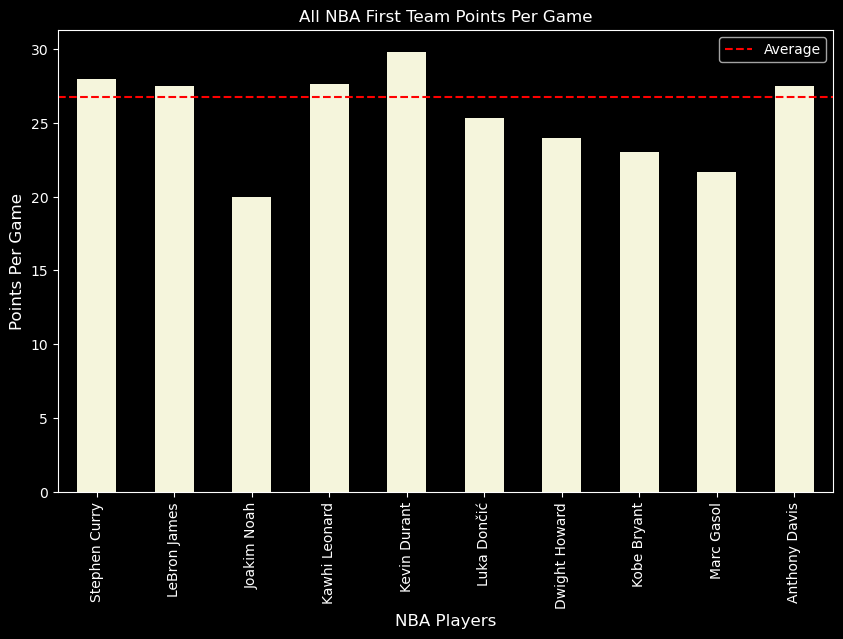

In [328]:
#Made this to grab random players to reduce the same players to appear more than once on the graph
dfr = tm1df.sample(n = 10)
# create variable which holds the average
average = tm1df['per'].mean()

# Select 10 values of the column
df_per_10 = dfr[["player", "per"]][:10]

df_per_10.plot(kind = "bar", figsize =(10,6), color = "Beige", x = "player", y ="per")

average_line = plt.axhline(average, color='red', linestyle='--', label='Average')

plt.style.use("dark_background")
plt.xlabel('NBA Players', fontsize = 12)
plt.ylabel('Points Per Game', fontsize = 12)

plt.title('All NBA First Team Points Per Game', fontsize = 12)
plt.legend(handles=[average_line])

plt.show()

In [329]:
tm2 = cleaned_df.all_nba_second_team > 0
tm2df = cleaned_df.loc[tm2]
tm2df.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk
147,1717.0,Dirk Nowitzki,1998.0,9.0,2007,1610612742,DAL,77.0,77.0,2769.0,630.0,1314.0,0.479,79.0,220.0,0.359,551.0,1094.0,0.504,0.510,478.0,544.0,0.879,95.0,564.0,659.0,266.0,51.0,71.0,160.0,198.0,1817.0,24.6,0.414,0.041,0.228,0.138,0.178,0.010,0.019,0.093,0.288,8.9,4.0,12.9,5.6,1.0,6.6,6.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,3.0,NaN,NaN,11.0,NaN,NaN,NaN,NaN
434,959.0,Steve Nash,1996.0,15.0,2007,1610612756,PHX,81.0,81.0,2780.0,485.0,962.0,0.504,179.0,381.0,0.470,306.0,581.0,0.527,0.597,222.0,245.0,0.906,28.0,254.0,282.0,898.0,53.0,5.0,295.0,113.0,1371.0,21.1,0.255,0.012,0.096,0.057,0.473,0.009,0.001,0.216,0.220,9.0,1.4,10.5,5.8,-1.8,3.9,4.2,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,4.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
442,2405.0,Amar'e Stoudemire,2002.0,9.0,2007,1610612756,PHX,79.0,79.0,2677.0,714.0,1211.0,0.590,5.0,31.0,0.161,709.0,1180.0,0.601,0.592,556.0,691.0,0.805,178.0,541.0,719.0,118.0,64.0,163.0,174.0,294.0,1989.0,27.6,0.571,0.082,0.211,0.152,0.075,0.012,0.040,0.103,0.282,10.9,3.8,14.6,4.2,0.6,4.8,4.6,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,True,False,2.0,NaN,NaN,6.0,NaN,NaN,NaN,NaN
485,1495.0,Tim Duncan,1997.0,1.0,2007,1610612759,SAS,78.0,78.0,2651.0,585.0,1178.0,0.497,0.0,4.0,0.000,585.0,1174.0,0.498,0.497,338.0,463.0,0.730,237.0,644.0,881.0,218.0,56.0,152.0,178.0,185.0,1508.0,24.4,0.393,0.107,0.283,0.196,0.157,0.011,0.043,0.114,0.282,4.9,6.2,11.1,3.0,2.2,5.2,4.8,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,True,False,2.0,9.0,NaN,7.0,NaN,NaN,NaN,NaN
503,101114.0,Deron Williams,2005.0,3.0,2007,1610612762,UTA,82.0,82.0,3059.0,566.0,1117.0,0.507,83.0,210.0,0.395,483.0,907.0,0.533,0.544,330.0,411.0,0.803,34.0,209.0,243.0,862.0,90.0,23.0,279.0,200.0,1545.0,20.8,0.368,0.014,0.083,0.049,0.436,0.015,0.006,0.177,0.231,8.9,2.3,11.3,4.9,-1.1,3.8,4.5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,21.0,12.0,NaN,NaN,NaN,NaN


In [330]:
tm2df['per'].mean()

23.929333333333332

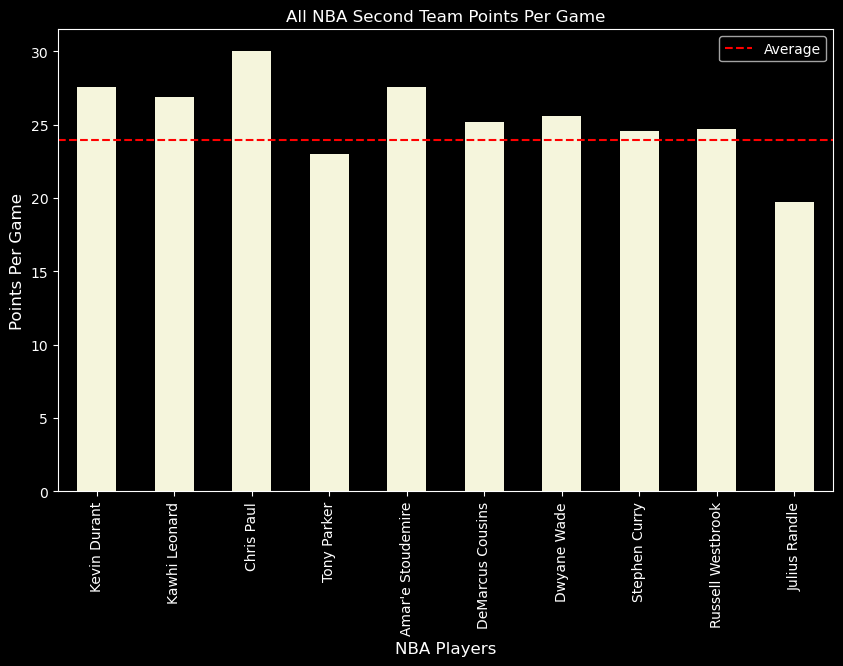

In [331]:
#Made this to grab random players to reduce the same players to appear more than once on the graph
dfr2 = tm2df.sample(n = 10)
# create variable which holds the average
average2 =tm2df['per'].mean()

# Select 10 values of the column
df_per_10 = dfr2[["player", "per"]][:10]

df_per_10.plot(kind = "bar", figsize =(10,6), color = "Beige", x = "player", y ="per")

average_line2 = plt.axhline(average2, color='red', linestyle='--', label='Average')

plt.style.use("dark_background")
plt.xlabel('NBA Players', fontsize = 12)
plt.ylabel('Points Per Game', fontsize = 12)

plt.title('All NBA Second Team Points Per Game', fontsize = 12)
plt.legend(handles=[average_line2])

plt.show()

In [332]:
tm3 = cleaned_df.all_nba_third_team > 0
tm3df = cleaned_df.loc[tm3]


In [333]:
tm3df['per'].mean()

21.840789473684207

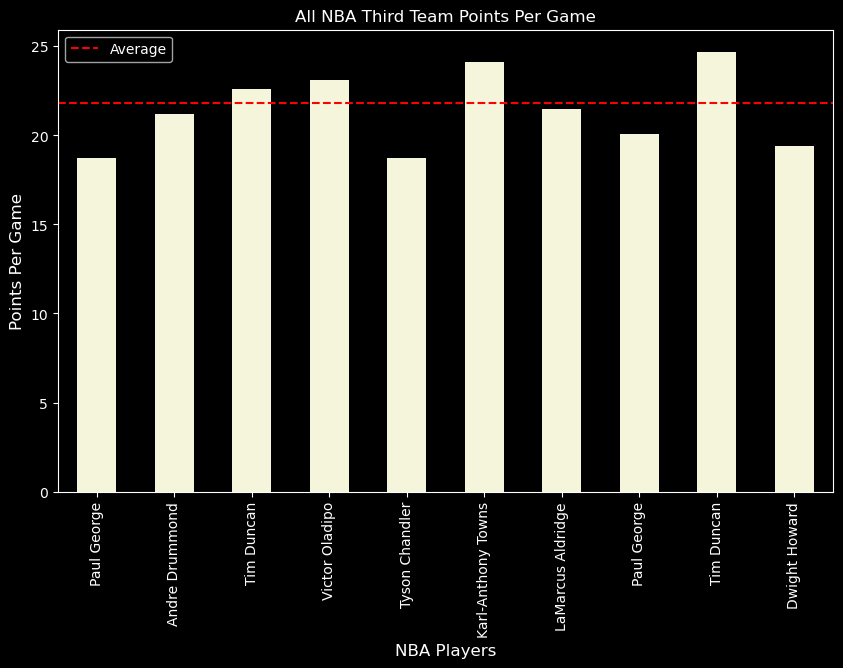

In [334]:
#Made this to grab random players to reduce the same players to appear more than once on the graph
dfr3 = tm3df.sample(n = 10)
# create variable which holds the average
average3 =tm3df['per'].mean()

# Select 10 values of the column
df_per_10 = dfr3[["player", "per"]][:10]

df_per_10.plot(kind = "bar", figsize =(10,6), color = "Beige", x = "player", y ="per")

average_line3 = plt.axhline(average3, color='red', linestyle='--', label='Average')

plt.style.use("dark_background")
plt.xlabel('NBA Players', fontsize = 12)
plt.ylabel('Points Per Game', fontsize = 12)

plt.title('All NBA Third Team Points Per Game', fontsize = 12)
plt.legend(handles=[average_line3])

plt.show()

In [335]:
allstr = cleaned_df.all_star_game == True
allstrdf = cleaned_df.loc[allstr]
allstrdf.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk
13,2207.0,Joe Johnson,2001.0,10.0,2007,1610612737,ATL,82.0,82.0,3343.0,647.0,1497.0,0.432,169.0,444.0,0.381,478.0,1053.0,0.454,0.489,316.0,379.0,0.834,83.0,284.0,367.0,474.0,84.0,18.0,223.0,168.0,1779.0,17.3,0.253,0.029,0.099,0.064,0.255,0.013,0.004,0.118,0.256,5.3,1.7,7.0,2.7,-1.5,1.2,2.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.0,True,False,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29,467.0,Jason Kidd,1994.0,2.0,2007,1610612751,BKN,51.0,51.0,1895.0,201.0,549.0,0.366,84.0,236.0,0.356,117.0,313.0,0.374,0.443,91.0,111.0,0.820,58.0,354.0,412.0,530.0,74.0,15.0,185.0,90.0,577.0,15.7,0.202,0.035,0.217,0.126,0.455,0.020,0.006,0.236,0.189,0.4,2.1,2.5,1.4,0.8,2.2,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30,467.0,Jason Kidd,1994.0,2.0,2007,1610612742,DAL,29.0,29.0,1011.0,104.0,244.0,0.426,35.0,76.0,0.461,69.0,168.0,0.411,0.498,44.0,54.0,0.815,36.0,152.0,188.0,276.0,62.0,11.0,81.0,75.0,287.0,18.4,0.221,0.043,0.168,0.107,0.411,0.033,0.008,0.232,0.161,1.6,1.7,3.3,2.2,2.2,4.4,1.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True,False,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57,708.0,Kevin Garnett,1995.0,5.0,2007,1610612738,BOS,71.0,71.0,2328.0,534.0,990.0,0.539,0.0,11.0,0.000,534.0,979.0,0.545,0.539,269.0,336.0,0.801,135.0,520.0,655.0,244.0,100.0,89.0,138.0,163.0,1337.0,25.3,0.339,0.073,0.251,0.168,0.199,0.023,0.031,0.108,0.255,6.6,6.2,12.9,4.7,3.5,8.2,6.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,True,False,1.0,1.0,NaN,3.0,NaN,NaN,NaN,NaN
59,1718.0,Paul Pierce,1998.0,10.0,2007,1610612738,BOS,80.0,80.0,2874.0,509.0,1098.0,0.464,143.0,365.0,0.392,366.0,733.0,0.499,0.529,409.0,485.0,0.843,53.0,358.0,411.0,363.0,101.0,36.0,221.0,200.0,1570.0,19.6,0.442,0.023,0.140,0.085,0.218,0.019,0.010,0.144,0.248,6.7,5.7,12.4,3.3,1.4,4.8,5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,True,False,4.0,NaN,NaN,14.0,NaN,NaN,NaN,NaN


In [336]:
allstrdf['per'].mean()

22.292555831265513

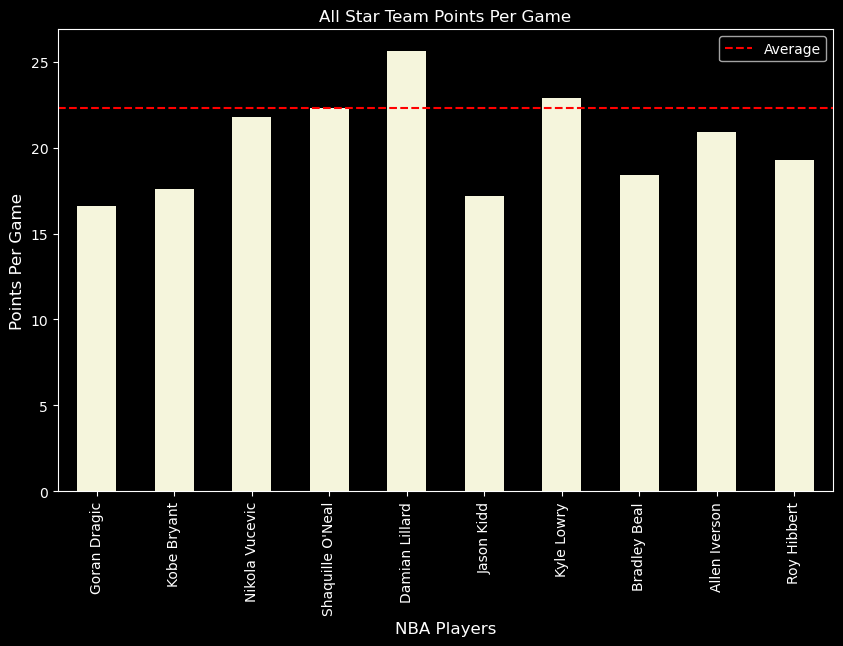

In [337]:
#Made this to grab random players to reduce the same players to appear more than once on the graph
dfr4 = allstrdf.sample(n = 10)
# create variable which holds the average
average4 =allstrdf['per'].mean()

# Select 10 values of the column
df_per_10 = dfr4[["player", "per"]][:10]

df_per_10.plot(kind = "bar", figsize =(10,6), color = "Beige", x = "player", y ="per")

average_line4 = plt.axhline(average4, color='red', linestyle='--', label='Average')

plt.style.use("dark_background")
plt.xlabel('NBA Players', fontsize = 12)
plt.ylabel('Points Per Game', fontsize = 12)

plt.title('All Star Team Points Per Game', fontsize = 12)
plt.legend(handles=[average_line4])

plt.show()

<strong><span style="color:red">Question 1 Outline & Analysis</span></strong> 

## Question 1 Outline

##### I opted to construct individual masked DataFrames for each NBA All-Selection recipient. Upon the establishment of these masked DataFrames, the subsequent step involved calculating the mean of the 'per' column. Subsequently, I devised a code snippet designed to extract a random subset of 10 players from the masked DataFrame. This measure was implemented to decrease the likelihood of a player being represented on the bar graph in a repetitive manner, a choice motivated by aesthetic considerations. The replication of a player's presence on the graph signifies their attainment of an NBA All-Selection accolade across multiple seasons.

##### By incorporating the points-per-game average as a distinct line within the bar graph, which comprehensively portrays all players who have secured NBA All-Selection distinctions, a compelling narrative emerges. This graphical representation effectively illustrates the comparison of players who achieved this distinction while maintaining an average below the set threshold, along with those who surpassed this threshold. Such an approach enables the visualization of players who outperformed the average as well as those who, despite operating below the average, achieved the esteemed status of NBA All-Selection.

## Question 1 Analysis

##### The points-per-game average serves as a revealing metric that elucidates the distinct implications associated with each accolade. Notably, the divergence in points-per-game average between All-Star selections and those attaining positions in the All-NBA First Team can be rationalized by the distinctive criteria underlying these distinctions. The selection process for NBA All-Star participants diverges from a strict performance-based evaluation, instead encompassing a composite of fan, player, and media voting. Consequently, this approach introduces an element of popularity into the selection, whereby players with substantial renown and expansive fanbases can garner selection votes even in the presence of less stellar seasonal performances.

##### For instance, prominent figures like Stephen Curry, who enjoy household recognition, possess the capacity to secure All-Star berths, even during seasons marked by subpar or average performance levels. The statistical comparison of average points per game between the All-NBA Third and Second Teams reveals a convergence, indicating that points scored constitute a pivotal determinant for team selection. This observation suggests that while points per game indeed assume a central role, other pertinent statistics are also under consideration when adjudging a player's placement within a specific team tier, or indeed, their inclusion within any team at all.

##### In summation, the points-per-game metric unveils the intrinsic dynamics of these distinctions. The nuanced criteria associated with All-Star and All-NBA Team selections underscore the multifaceted nature of recognition within the NBA, where performance, popularity, and statistical contributions intertwine to shape a player's standing and accolades.




<strong><span style="color:red">ANSWER 1:</span></strong>   

1st Team: 26.7 points per game  
2nd Team: 23.9 points per game  
3rd Team: 21.8 points per game  
All-Star: 22.2 points per game  

### Question 2  

**QUESTION:** What was the average number of years of experience in the league it takes for players to make their first All NBA Selection (1st, 2nd, or 3rd team)? Please limit your sample to players drafted in 2007 or later who did eventually go on to win at least one All NBA selection. For example:

- Luka Doncic is in the dataset as 2 years. He was drafted in 2018 and won his first All NBA award in 2019 (which was his second season).  
- LeBron James is not in this dataset, as he was drafted prior to 2007.  
- Lu Dort is not in this dataset, as he has not received any All NBA honors.  



In [338]:
#Making filter to only have players that were drafted in 2007 or after
draft = cleaned_df.draftyear >= 2007
draftdf = cleaned_df.loc[draft]
draftdf.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk
3,201151.0,Acie Law,2007.0,11.0,2007,1610612737,ATL,56.0,6.0,865.0,95.0,237.0,0.401,7.0,34.0,0.206,88.0,203.0,0.433,0.416,38.0,48.0,0.792,12.0,45.0,57.0,113.0,29.0,0.0,56.0,73.0,235.0,7.7,0.203,0.016,0.060,0.038,0.204,0.018,0.000,0.178,0.165,-0.5,0.4,-0.1,-4.2,-1.0,-5.2,-0.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,201143.0,Al Horford,2007.0,3.0,2007,1610612737,ATL,81.0,77.0,2540.0,333.0,668.0,0.499,0.0,5.0,0.000,333.0,663.0,0.502,0.499,155.0,212.0,0.731,248.0,537.0,785.0,124.0,60.0,76.0,137.0,267.0,821.0,14.7,0.317,0.114,0.245,0.180,0.079,0.012,0.022,0.153,0.160,2.4,3.0,5.5,-1.2,-0.3,-1.6,0.3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,False,True,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN
22,201238.0,Mario West,2007.0,NaN,2007,1610612737,ATL,64.0,2.0,269.0,21.0,49.0,0.429,0.0,4.0,0.000,21.0,45.0,0.467,0.429,17.0,26.0,0.654,26.0,22.0,48.0,13.0,12.0,4.0,9.0,61.0,59.0,8.6,0.531,0.113,0.095,0.104,0.072,0.024,0.011,0.130,0.117,0.2,0.2,0.5,-4.4,0.6,-3.8,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,201157.0,Sean Williams,2007.0,17.0,2007,1610612751,BKN,73.0,29.0,1278.0,164.0,305.0,0.538,0.0,0.0,NaN,164.0,305.0,0.538,0.538,81.0,133.0,0.609,115.0,207.0,322.0,28.0,28.0,106.0,70.0,193.0,409.0,13.9,0.436,0.104,0.188,0.146,0.037,0.011,0.065,0.161,0.155,0.8,1.7,2.5,-3.3,1.1,-2.2,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,201172.0,Gabe Pruitt,2007.0,32.0,2007,1610612738,BOS,15.0,0.0,95.0,14.0,39.0,0.359,3.0,12.0,0.250,11.0,27.0,0.407,0.397,1.0,2.0,0.500,1.0,7.0,8.0,13.0,5.0,0.0,5.0,10.0,32.0,8.3,0.051,0.013,0.083,0.050,0.225,0.028,0.000,0.111,0.220,-0.1,0.2,0.1,-5.7,0.8,-4.8,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [339]:
#The function checks if the value of the all_nba_first_team column in the input row is equal to 1. 
# If it is, it means that the player was selected to the All-NBA First Team in that season. 
# In this case, the function returns the value of the season column from the input row.
def get_first_all_nba_season(row):
    if row['all_nba_first_team'] == 1:
        return row['season']
    elif row['all_nba_second_team'] == 1:
        return row['season'] + 1
    elif row['all_nba_third_team'] == 1:
        return row['season'] + 2
    else:
        return None
    

# Create the new column for the season of the first All-NBA selection
draftdf['first_all_nba_season'] = draftdf.apply(get_first_all_nba_season, axis=1)

In [340]:

draftdf["first_all_nba_season"].value_counts()

2018.0    14
2019.0    14
2020.0    13
2021.0    13
2016.0    12
2017.0    12
2022.0    10
2014.0     9
2015.0     9
2013.0     6
2012.0     5
2023.0     3
2010.0     2
2011.0     2
2009.0     1
Name: first_all_nba_season, dtype: int64

In [341]:
#Create a new column which shows the length of how long it took for that player to get their first nba selection
#This was created by subtracting the year they won their first all nba with their draft year  
draftdf["Years_to_first_NBA_Selection"] = draftdf["first_all_nba_season"] - draftdf["draftyear"]
draftdf["Years_to_first_NBA_Selection"].value_counts()

5.0     21
4.0     18
7.0     17
6.0     14
8.0     14
9.0     11
10.0     8
3.0      6
2.0      4
11.0     4
12.0     3
13.0     3
1.0      1
15.0     1
Name: Years_to_first_NBA_Selection, dtype: int64

In [342]:
draftdf["Years_to_first_NBA_Selection"].mean()

6.656

In [343]:
#Dropping null values to turn the column into a integer data type so the values look more presentable on the graph
draftdf = draftdf.dropna(subset=['Years_to_first_NBA_Selection'])
draftdf = draftdf.reset_index(drop = True)
draftdf['Years_to_first_NBA_Selection'] = draftdf['Years_to_first_NBA_Selection'].astype(int)

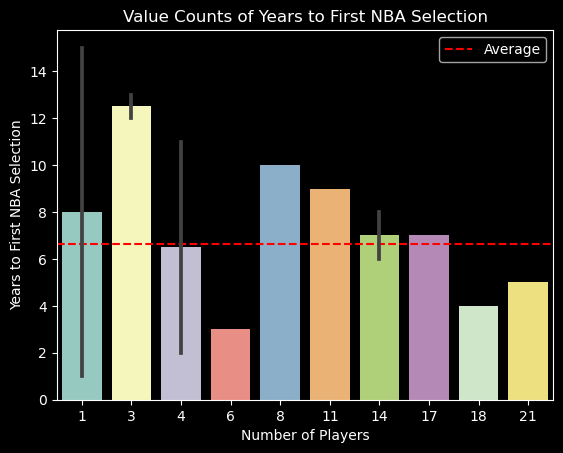

In [344]:
count_df = draftdf['Years_to_first_NBA_Selection'].value_counts().reset_index()
count_df.columns = ['Years_to_first_NBA_Selection', 'Count']
count_df.sort_values('Years_to_first_NBA_Selection', inplace=True)
average = draftdf["Years_to_first_NBA_Selection"].mean()
plt.axhline(y=average, color='r', linestyle='--', label='Average')
sns.barplot(x='Count', y='Years_to_first_NBA_Selection', data=count_df)
plt.xlabel('Number of Players')
plt.ylabel('Years to First NBA Selection')
plt.title('Value Counts of Years to First NBA Selection')
plt.legend()

# Set the y-axis tick labels as integers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

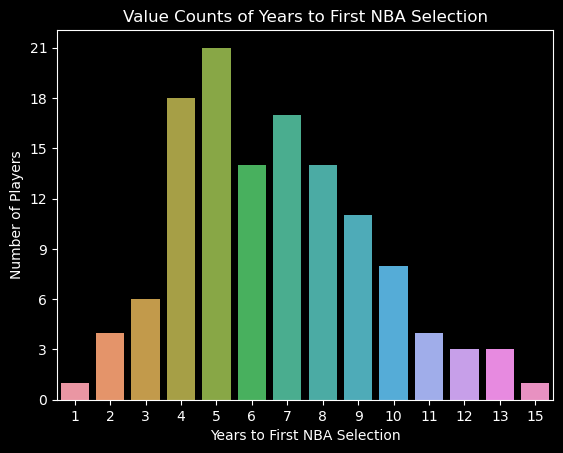

In [345]:
#Decided to do another version of graph with no average line as well
count_df = draftdf['Years_to_first_NBA_Selection'].value_counts().reset_index()
count_df.columns = ['Years_to_first_NBA_Selection', 'Count']
count_df.sort_values('Years_to_first_NBA_Selection', inplace=True)
sns.barplot(x='Years_to_first_NBA_Selection', y='Count', data=count_df)
plt.xlabel('Years to First NBA Selection')
plt.ylabel('Number of Players')
plt.title('Value Counts of Years to First NBA Selection')

# Set the y-axis tick labels as integers
plt.gca().yaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.show()

<strong><span style="color:red">Question 2 Outline & Analysis</span></strong>

## Question 2 Outline 

#####  After creating a masked DataFrame exclusively for players drafted in 2007, I crafted a function to analyze each column in the input row. If the 'all_nba_first_team' value equated to 1, it signified the player's selection for the All-NBA First Team during that season. Consequently, the function returned the corresponding value from the season column of the same row, indicating the year of the First Team selection.
##### In scenarios where the player's First Team selection was absent, the code progressed to the subsequent condition. Here, examination shifted to the all_nba_second_team column. A value of 1 indicated selection for the All-NBA Second Team, leading the function to return the season column's value, incremented by 1. This adjustment conveyed the year of the player's Second Team selection, which followed the originally specified season.
##### Should neither the First nor Second Team selection be applicable, the code advanced to the final condition. This stage focused on the all_nba_third_team column, where a value of 1 marked selection for the All-NBA Third Team. The function, in this case, returned the season column's value, increased by 2. This augmentation signaled the year of the player's Third Team selection, transpiring two seasons after the initially mentioned year.
##### Failure to meet any of the stipulated conditions suggested the player hadn't received any All-NBA Team selections. Here, the function returned None, denoting the absence of a valid selection.
##### Following the establishment of the function, I introduced a new column named 'first_all_nba_season,' wherein the function was applied. Subsequently, the creation of a column named "Years_to_first_NBA_Selection" ensued, materializing through the subtraction of the year the player was drafted.

## Question 2 Analysis
### Player Development:
##### NBA players typically enter the league after college or as international prospects. The 6.6-year average indicates that it takes time for players to adapt to the higher level of competition, learn the nuances of the NBA game, and refine their skills to an elite level.
##### Player development is an intricate and ongoing process in the NBA. It encompasses not only physical skills but also mental toughness, basketball IQ, and adapting to various playing styles. Young talents often need time to adjust to the intensity and demands of professional basketball.
### Patience and Persistence:
##### This statistic emphasizes the importance of patience and persistence in the careers of NBA players. It often takes several seasons of hard work, dedication, and experience to reach the level where they can secure an NBA selection.
##### Patience is crucial for both players and teams, as growth and improvement may not happen overnight. Players need to persevere through injuries, setbacks, and competition to carve out their niche in the league. Likewise, teams must exhibit patience in nurturing their young talents.
### Variability:
##### While the average of 6.6 years provides a general guideline, it's essential to note that there is significant variability among players. Some players may achieve their first NBA selection earlier in their careers, while others may take longer or may never achieve this milestone.
##### This variability underscores the diverse paths that NBA careers can take. Factors such as talent, work ethic, coaching, and opportunities all play a role in determining a player's trajectory. Some may blossom quickly as rookies, while others may require years of development before reaching their peak performance.
### Impact of Age:
##### The age at which players enter the league can influence the time it takes to achieve an NBA selection. Younger players may have more time to develop and reach their peak, while older rookies may need to accelerate their development to catch up.
##### Age is a critical consideration in assessing a player's potential. Young prospects often have greater room for growth and development, while older rookies may be expected to contribute immediately. Teams must strike a balance between nurturing young talent and maximizing the potential of more experienced players.
##### In summary, player development in the NBA is a dynamic and multifaceted journey that demands patience, persistence, and an understanding of the variability in player trajectories. The impact of age further complicates this process, making it essential for teams and players alike to adapt and evolve throughout their careers.

<strong><span style="color:red">ANSWER 2:</span></strong>  

6.6 Years  

## Data Cleaning Interlude  

You're going to work to create a dataset with a "career outcome" for each player, representing the highest level of success that the player achieved for **at least two** seasons *after his first four seasons in the league* (examples to follow below!). To do this, you'll start with single season level outcomes. On a single season level, the outcomes are:  

- Elite: A player is "Elite" in a season if he won any All NBA award (1st, 2nd, or 3rd team), MVP, or DPOY in that season.    
- All-Star: A player is "All-Star" in a season if he was selected to be an All-Star that season.   
- Starter:  A player is a "Starter" in a season if he started in at least 41 games in the season OR if he played at least 2000 minutes in the season.    
- Rotation:  A player is a "Rotation" player in a season if he played at least 1000 minutes in the season.   
- Roster:  A player is a "Roster" player in a season if he played at least 1 minute for an NBA team but did not meet any of the above criteria.     
- Out of the League: A player is "Out of the League" if he is not in the NBA in that season.   

We need to make an adjustment for determining Starter/Rotation qualifications for a few seasons that didn't have 82 games per team. Assume that there were 66 possible games in the 2011 lockout season and 72 possible games in each of the 2019 and 2020 seasons that were shortened due to covid. Specifically, if a player played 900 minutes in 2011, he **would** meet the rotation criteria because his final minutes would be considered to be 900 * (82/66) = 1118. Please use this math for both minutes and games started, so a player who started 38 games in 2019 or 2020 would be considered to have started 38 * (82/72) = 43 games, and thus would qualify for starting 41. Any answers should be calculated assuming you round the multiplied values to the nearest whole number.

Note that on a season level, a player's outcome is the highest level of success he qualifies for in that season. Thus, since Shai Gilgeous-Alexander was both All-NBA 1st team and an All-Star last year, he would be considered to be "Elite" for the 2022 season, but would still qualify for a career outcome of All-Star if in the rest of his career he made one more All-Star game but no more All-NBA teams. Note this is a hypothetical, and Shai has not yet played enough to have a career outcome.    

Examples:  

- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Rotation (3), Roster (4), Roster (5), Out of the League (6+) would be considered "Out of the League," because after his first four seasons, he only has a single Roster year, which does not qualify him for any success outcome.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), All-Star (7), Elite (8), Starter (9) would be considered "All-Star," because he had at least two seasons after his first four at all-star level of production or higher.  
- A player who enters the league as a rookie and has season outcomes of Roster (1), Rotation (2), Starter (3), Starter (4), Starter (5), Starter (6), Rotation (7), Rotation (8), Roster (9) would be considered a "Starter" because he has two seasons after his first four at a starter level of production. 


### Question 3  

**QUESTION:** There are 73 players in the `player_data` dataset who have 2010 listed as their draft year. How many of those players have a **career** outcome in each of the 6 buckets?  

In [346]:
#Create filter to players that were only drafted in 2010
outcome = cleaned_df.draftyear == 2010
career_df = cleaned_df.loc[outcome]
career_df.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk
1564,202377.0,Pape Sy,2010.0,53.0,2010,1610612737,ATL,3.0,0.0,21.0,2.0,6.0,0.333,0.0,1.0,0.000,2.0,5.0,0.400,0.333,3.0,3.0,1.000,2.0,1.0,3.0,2.0,1.0,0.0,3.0,1.0,7.0,9.2,0.500,0.116,0.057,0.086,0.145,0.026,0.000,0.291,0.233,0.0,0.0,0.0,-3.5,-2.5,-6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1566,202348.0,Jordan Crawford,2010.0,27.0,2010,1610612737,ATL,16.0,0.0,160.0,27.0,77.0,0.351,9.0,27.0,0.333,18.0,50.0,0.360,0.409,4.0,6.0,0.667,9.0,19.0,28.0,15.0,3.0,0.0,15.0,13.0,67.0,7.6,0.078,0.068,0.142,0.105,0.160,0.010,0.000,0.158,0.281,-0.4,0.1,-0.3,-2.8,-2.7,-5.5,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1567,202348.0,Jordan Crawford,2010.0,27.0,2010,1610612764,WAS,26.0,18.0,867.0,165.0,423.0,0.390,24.0,101.0,0.238,141.0,322.0,0.438,0.418,69.0,78.0,0.885,22.0,55.0,77.0,102.0,36.0,3.0,68.0,50.0,423.0,12.6,0.184,0.028,0.075,0.051,0.205,0.021,0.003,0.129,0.268,-0.6,0.3,-0.3,-1.2,-2.2,-3.4,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1579,202345.0,Damion James,2010.0,24.0,2010,1610612751,BKN,25.0,9.0,403.0,46.0,103.0,0.447,0.0,3.0,0.000,46.0,100.0,0.460,0.447,18.0,28.0,0.643,17.0,68.0,85.0,20.0,16.0,12.0,25.0,36.0,110.0,10.1,0.272,0.048,0.205,0.125,0.081,0.021,0.023,0.178,0.162,-0.4,0.5,0.1,-3.8,1.1,-2.6,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1580,202324.0,Derrick Favors,2010.0,3.0,2010,1610612751,BKN,56.0,23.0,1091.0,141.0,276.0,0.511,0.0,0.0,NaN,141.0,276.0,0.511,0.511,71.0,116.0,0.612,126.0,171.0,297.0,21.0,18.0,41.0,56.0,183.0,353.0,12.6,0.420,0.133,0.191,0.161,0.032,0.009,0.029,0.146,0.163,0.9,1.0,1.9,-3.2,-0.7,-3.9,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [347]:
#Checking to see if I was missing any players 
num_players = len(career_df['player'].unique())
print("Number of different NBA players:", num_players)

Number of different NBA players: 73


In [348]:
#Create a column in which if a player has any nba awards which is determined by 1 then it's yes, if not then no 
career_df['all_nba_award'] = np.where((career_df['all_nba_first_team'] == 1) | 
                                 (career_df['all_nba_second_team'] == 1) | 
                                 (career_df['all_nba_third_team'] == 1), 
                                 'yes', 'no')

In [349]:
career_df.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk,all_nba_award
1564,202377.0,Pape Sy,2010.0,53.0,2010,1610612737,ATL,3.0,0.0,21.0,2.0,6.0,0.333,0.0,1.0,0.000,2.0,5.0,0.400,0.333,3.0,3.0,1.000,2.0,1.0,3.0,2.0,1.0,0.0,3.0,1.0,7.0,9.2,0.500,0.116,0.057,0.086,0.145,0.026,0.000,0.291,0.233,0.0,0.0,0.0,-3.5,-2.5,-6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
1566,202348.0,Jordan Crawford,2010.0,27.0,2010,1610612737,ATL,16.0,0.0,160.0,27.0,77.0,0.351,9.0,27.0,0.333,18.0,50.0,0.360,0.409,4.0,6.0,0.667,9.0,19.0,28.0,15.0,3.0,0.0,15.0,13.0,67.0,7.6,0.078,0.068,0.142,0.105,0.160,0.010,0.000,0.158,0.281,-0.4,0.1,-0.3,-2.8,-2.7,-5.5,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
1567,202348.0,Jordan Crawford,2010.0,27.0,2010,1610612764,WAS,26.0,18.0,867.0,165.0,423.0,0.390,24.0,101.0,0.238,141.0,322.0,0.438,0.418,69.0,78.0,0.885,22.0,55.0,77.0,102.0,36.0,3.0,68.0,50.0,423.0,12.6,0.184,0.028,0.075,0.051,0.205,0.021,0.003,0.129,0.268,-0.6,0.3,-0.3,-1.2,-2.2,-3.4,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
1579,202345.0,Damion James,2010.0,24.0,2010,1610612751,BKN,25.0,9.0,403.0,46.0,103.0,0.447,0.0,3.0,0.000,46.0,100.0,0.460,0.447,18.0,28.0,0.643,17.0,68.0,85.0,20.0,16.0,12.0,25.0,36.0,110.0,10.1,0.272,0.048,0.205,0.125,0.081,0.021,0.023,0.178,0.162,-0.4,0.5,0.1,-3.8,1.1,-2.6,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no
1580,202324.0,Derrick Favors,2010.0,3.0,2010,1610612751,BKN,56.0,23.0,1091.0,141.0,276.0,0.511,0.0,0.0,NaN,141.0,276.0,0.511,0.511,71.0,116.0,0.612,126.0,171.0,297.0,21.0,18.0,41.0,56.0,183.0,353.0,12.6,0.420,0.133,0.191,0.161,0.032,0.009,0.029,0.146,0.163,0.9,1.0,1.9,-3.2,-0.7,-3.9,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no


In [350]:
def determine_career_outcome(row):
    # Adjust for shortened seasons
    if row['season'] == 2011:
        row['games_start'] *= (82/66)
        row['mins'] *= (82/66)
    elif row['season'] in [2019, 2020]:
        row['games_start'] *= (82/72)
        row['mins'] *= (82/72)

    # Determine career outcome
    if row['all_nba_award'] == 'yes' or row['most_valuable_player_rk'] >0 or row['defensive_player_of_the_year_rk'] > 0:
        return 'Elite'
    elif row['all_star_game'] == True or ['rookie_all_star_game'] == True:
        return 'All-Star'
    elif row['games_start'] >= 41 or row['mins'] >= 2000:
        return 'Starter'
    elif row['mins'] >= 1000:
        return 'Rotation'
    elif row['mins'] >= 1:
        return 'Roster'
    else:
        return 'Out of the League'

career_df['career_outcome'] = career_df.apply(determine_career_outcome, axis=1)

In [351]:
career_df.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk,all_nba_award,career_outcome
1564,202377.0,Pape Sy,2010.0,53.0,2010,1610612737,ATL,3.0,0.0,21.0,2.0,6.0,0.333,0.0,1.0,0.000,2.0,5.0,0.400,0.333,3.0,3.0,1.000,2.0,1.0,3.0,2.0,1.0,0.0,3.0,1.0,7.0,9.2,0.500,0.116,0.057,0.086,0.145,0.026,0.000,0.291,0.233,0.0,0.0,0.0,-3.5,-2.5,-6.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,Roster
1566,202348.0,Jordan Crawford,2010.0,27.0,2010,1610612737,ATL,16.0,0.0,160.0,27.0,77.0,0.351,9.0,27.0,0.333,18.0,50.0,0.360,0.409,4.0,6.0,0.667,9.0,19.0,28.0,15.0,3.0,0.0,15.0,13.0,67.0,7.6,0.078,0.068,0.142,0.105,0.160,0.010,0.000,0.158,0.281,-0.4,0.1,-0.3,-2.8,-2.7,-5.5,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,Roster
1567,202348.0,Jordan Crawford,2010.0,27.0,2010,1610612764,WAS,26.0,18.0,867.0,165.0,423.0,0.390,24.0,101.0,0.238,141.0,322.0,0.438,0.418,69.0,78.0,0.885,22.0,55.0,77.0,102.0,36.0,3.0,68.0,50.0,423.0,12.6,0.184,0.028,0.075,0.051,0.205,0.021,0.003,0.129,0.268,-0.6,0.3,-0.3,-1.2,-2.2,-3.4,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,Roster
1579,202345.0,Damion James,2010.0,24.0,2010,1610612751,BKN,25.0,9.0,403.0,46.0,103.0,0.447,0.0,3.0,0.000,46.0,100.0,0.460,0.447,18.0,28.0,0.643,17.0,68.0,85.0,20.0,16.0,12.0,25.0,36.0,110.0,10.1,0.272,0.048,0.205,0.125,0.081,0.021,0.023,0.178,0.162,-0.4,0.5,0.1,-3.8,1.1,-2.6,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,Roster
1580,202324.0,Derrick Favors,2010.0,3.0,2010,1610612751,BKN,56.0,23.0,1091.0,141.0,276.0,0.511,0.0,0.0,NaN,141.0,276.0,0.511,0.511,71.0,116.0,0.612,126.0,171.0,297.0,21.0,18.0,41.0,56.0,183.0,353.0,12.6,0.420,0.133,0.191,0.161,0.032,0.009,0.029,0.146,0.163,0.9,1.0,1.9,-3.2,-0.7,-3.9,-0.5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,False,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no,Rotation


In [352]:
career_df.columns

Index(['nbapersonid', 'player', 'draftyear', 'draftpick', 'season',
       'nbateamid', 'team', 'games', 'games_start', 'mins', 'fgm', 'fga',
       'fgp', 'fgm3', 'fga3', 'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg', 'ftm',
       'fta', 'ftp', 'off_reb', 'def_reb', 'tot_reb', 'ast', 'steals',
       'blocks', 'tov', 'tot_fouls', 'points', 'per', 'ftr', 'off_reb_pct',
       'def_reb_pct', 'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
       'tov_pct', 'usg', 'ows', 'dws', 'ws', 'obpm', 'dbpm', 'bpm', 'vorp',
       'all_nba_defensive_first_team', 'all_nba_defensive_second_team',
       'all_nba_first_team', 'all_nba_second_team', 'all_nba_third_team',
       'all_rookie_first_team', 'all_rookie_second_team',
       'bill_russell_nba_finals_mvp', 'player_of_the_month',
       'player_of_the_week', 'rookie_of_the_month', 'all_star_game',
       'rookie_all_star_game', 'allstar_rk', 'defensive_player_of_the_year_rk',
       'most_improved_player_rk', 'most_valuable_player_rk',
       'rookie

In [353]:
cols = 'nbapersonid', 'player', 'draftyear','career_outcome','season','team'
outcomedf = career_df.loc[:,cols]
outcomedf.head()

,nbapersonid,player,draftyear,career_outcome,season,team
1564,202377.0,Pape Sy,2010.0,Roster,2010,ATL
1566,202348.0,Jordan Crawford,2010.0,Roster,2010,ATL
1567,202348.0,Jordan Crawford,2010.0,Roster,2010,WAS
1579,202345.0,Damion James,2010.0,Roster,2010,BKN
1580,202324.0,Derrick Favors,2010.0,Rotation,2010,BKN


In [354]:
outcomedf["career_outcome"].value_counts()

Roster      251
Rotation     80
Starter      79
Elite        18
All-Star      9
Name: career_outcome, dtype: int64

In [355]:
### I wanted to just bring players for their season in 2013 due to normally getting an idea of career outcome by their 3rd year
###However doing this dropped my count to only 24 which means vast majority of players were either injured or didn't play 

#outcome = outcomedf.season == 2013
#outcomedf = outcomedf.loc[outcome]
#outcomedf.head()

In [356]:
#Decided to add team on this due to certain player getting traded within the same season
no_dupes = outcomedf.drop_duplicates(subset=['player','team'], inplace=True)
no_dupes = outcomedf.reset_index(drop=True)
no_dupes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nbapersonid     240 non-null    float64
 1   player          240 non-null    object 
 2   draftyear       240 non-null    float64
 3   career_outcome  240 non-null    object 
 4   season          240 non-null    int64  
 5   team            240 non-null    object 
dtypes: float64(2), int64(1), object(3)
memory usage: 11.4+ KB


In [357]:
no_dupes["career_outcome"].value_counts()

Roster      174
Rotation     38
Starter      24
Elite         3
All-Star      1
Name: career_outcome, dtype: int64

In [358]:
df_sorted = no_dupes.sort_values(['player', 'season'])
df_last_season = df_sorted.groupby('player').tail(1)

In [359]:
df_last_season.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 220 to 107
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   nbapersonid     73 non-null     float64
 1   player          73 non-null     object 
 2   draftyear       73 non-null     float64
 3   career_outcome  73 non-null     object 
 4   season          73 non-null     int64  
 5   team            73 non-null     object 
dtypes: float64(2), int64(1), object(3)
memory usage: 4.0+ KB


In [360]:
#My results if going by the players last season that they played
df_last_season["career_outcome"].value_counts()

Roster      65
Rotation     4
Starter      4
Name: career_outcome, dtype: int64

In [361]:
# Made each outcome an ID and did a groupby of the 73 players with their max ID, so which one occured the most 
cat_type = CategoricalDtype(categories=["Out of the League", "Roster", "Rotation", "Starter", "All-Star", "Elite"], ordered=True)
outcomedf['career_outcome'] = outcomedf['career_outcome'].astype(cat_type)

df_best = outcomedf.loc[outcomedf.groupby('player')['career_outcome'].idxmax()]


In [362]:
df_best.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73 entries, 4697 to 1863
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   nbapersonid     73 non-null     float64 
 1   player          73 non-null     object  
 2   draftyear       73 non-null     float64 
 3   career_outcome  73 non-null     category
 4   season          73 non-null     int64   
 5   team            73 non-null     object  
dtypes: category(1), float64(2), int64(1), object(2)
memory usage: 3.7+ KB


In [363]:
df_best["career_outcome"].value_counts()

Roster               44
Starter              17
Rotation              9
Elite                 2
All-Star              1
Out of the League     0
Name: career_outcome, dtype: int64

<strong><span style="color:red">Question 3 Outline & Analysis</span></strong>
## Question 3 Outline 

##### The first step was to create a filter for the DataFrame to facilitate the analysis. So, the DataFrame was filtered to include only the draft year 2010. After applying this filter to the DataFrame, I added a new column called 'all_nba_award.' This column was used to iterate through each row and check if a player had won any NBA selections.

##### Once the 'all_nba_award' column was created, I needed to develop a function to categorize career outcomes. This led to the creation of the 'determine_career_outcome' function, which takes a row of data as input and adjusts the player's statistics to account for shortened NBA seasons in 2011, 2019, and 2020. The function then evaluates various conditions based on the player's awards, playing time, and other factors to determine their career outcome. The possible outcomes include 'Elite,' 'All-Star,' 'Starter,' 'Rotation,' 'Roster,' or 'Out of the League.'

##### I encountered an issue where the function provided a career outcome for each season, resulting in some players having different outcomes depending on the season. To address this, I attempted two different approaches to make the outcomes more reasonable.

##### First, I decided to display their career outcome as their last season played. This approach seemed effective because it offers insights into their future based on their most recent season.

##### The second approach involved treating the outcomes as categorical data and then grouping them by each player and their maximum identifier (ID). This method shows the category that a player received most frequently throughout the dataset.

## Question 3 Analysis

##### Elite (2 players): The fact that two players from the 2010 draft year are classified as "Elite" suggests that these individuals have had exceptional careers in the NBA. They likely achieved significant recognition, awards, and accomplishments during their tenure.

##### All-Star (1 player): Only one player from this draft year has reached the coveted status of an NBA All-Star. Being selected as an All-Star is a prestigious achievement and demonstrates a high level of performance and recognition in the league.

##### Starter (17 players): Seventeen players have managed to establish themselves as starters in the NBA. Starting in games is an indicator of their importance to their respective teams and suggests that they have been reliable contributors to their squads.

##### Rotation (9 players): Nine players are categorized as "Rotation" players. These individuals have likely played valuable roles as substitutes, providing depth and versatility to their teams.

##### Roster (44 players): A significant portion of the players from the 2010 draft year, 44 in total, have maintained a spot on an NBA roster. While they may not have achieved All-Star status or become starters, they have had the opportunity to contribute to their teams in various capacities, which is a testament to their professional basketball careers.

##### Out of League (0 players): Interestingly, none of the players from the 2010 draft year are currently categorized as "Out of League." This suggests that they have remained active, which can explain a high count of players that are just in the "Roster" category

<strong><span style="color:red">ANSWER 3:</span></strong>  

Elite: 2 players.  
All-Star: 1 players.  
Starter: 17 players.  
Rotation: 9 players.  
Roster: 44 players.  
Out of League: 0 players.  

### Open Ended Modeling Question   

In this question, you will work to build a model to predict a player's career outcome based on information up through the first four years of his career. 

This question is intentionally left fairly open ended, but here are some notes and specifications.  

1. We know modeling questions can take a long time, and that qualified candidates will have different levels of experience with "formal" modeling. Don't be discouraged. It's not our intention to make you spend excessive time here. If you get your model to a good spot but think you could do better by spending a lot more time, you can just write a bit about your ideas for future improvement and leave it there. Further, we're more interested in your thought process and critical thinking than we are in specific modeling techniques. Using smart features is more important than using fancy mathematical machinery, and a successful candidate could use a simple regression approach. 

2. You may use any data provided in this project, but please do not bring in any external sources of data. Note that while most of the data provided goes back to 2007, All NBA and All Rookie team voting is only included back to 2011.  

3. A player needs to complete three additional seasons after their first four to be considered as having a distinct career outcome for our dataset. Because the dataset in this project ends in 2021, this means that a player would need to have had the chance to play in the '21, '20, and '19 seasons after his first four years, and thus his first four years would have been '18, '17, '16, and '15. **For this reason, limit your training data to players who were drafted in or before the 2015 season.** Karl-Anthony Towns was the #1 pick in that season.  

4. Once you build your model, predict on all players who were drafted in 2018-2021 (They have between 1 and 4 seasons of data available and have not yet started accumulating seasons that inform their career outcome).  

5. You can predict a single career outcome for each player, but it's better if you can predict the probability that each player falls into each outcome bucket.    

6. Include, as part of your answer:  
  - A brief written overview of how your model works, targeted towards a decision maker in the front office without a strong statistical background. 
  - What you view as the strengths and weaknesses of your model.  
  - How you'd address the weaknesses if you had more time and or more data.  
  - A matplotlib or plotly visualization highlighting some part of your modeling process, the model itself, or your results.  
  - Your predictions for Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey.  
  - (Bonus!) An html table (for example, see the package `reactable`) containing all predictions for the players drafted in 2019-2021.  



In [364]:
# ML Helpers/Metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve

# scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# trees
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

# fun ones
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [365]:
#Load in training data 
training = (cleaned_df.draftyear == 2015) 
traindf = cleaned_df.loc[training]
traindf.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk
4281,1626178.0,Rondae Hollis-Jefferson,2015.0,23.0,2015,1610612751,BKN,29.0,17.0,615.0,63.0,138.0,0.457,4.0,14.0,0.286,59.0,124.0,0.476,0.471,37.0,52.0,0.712,39.0,115.0,154.0,43.0,39.0,16.0,26.0,61.0,167.0,14.2,0.377,0.070,0.214,0.141,0.101,0.032,0.021,0.139,0.135,0.5,0.7,1.2,-1.4,2.2,0.8,0.4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20.0
4292,1626191.0,Chris McCullough,2015.0,29.0,2015,1610612751,BKN,24.0,4.0,362.0,44.0,109.0,0.404,13.0,34.0,0.382,31.0,75.0,0.413,0.463,11.0,23.0,0.478,25.0,43.0,68.0,9.0,28.0,12.0,15.0,39.0,112.0,12.2,0.211,0.076,0.136,0.105,0.037,0.039,0.027,0.112,0.165,-0.1,0.4,0.3,-2.7,0.4,-2.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4299,1626175.0,Jordan Mickey,2015.0,33.0,2015,1610612738,BOS,16.0,0.0,57.0,8.0,22.0,0.364,0.0,0.0,NaN,8.0,22.0,0.364,0.364,5.0,10.0,0.500,6.0,7.0,13.0,1.0,0.0,11.0,1.0,5.0,21.0,15.3,0.455,0.110,0.133,0.121,0.026,0.000,0.151,0.036,0.205,0.0,0.1,0.1,-2.6,1.1,-1.5,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4304,1626154.0,R.J. Hunter,2015.0,28.0,2015,1610612738,BOS,36.0,0.0,315.0,36.0,98.0,0.367,19.0,63.0,0.302,17.0,35.0,0.486,0.464,6.0,7.0,0.857,2.0,35.0,37.0,13.0,14.0,4.0,11.0,29.0,97.0,7.7,0.071,0.007,0.120,0.062,0.059,0.022,0.010,0.098,0.151,-0.1,0.4,0.3,-3.1,1.0,-2.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4311,1626179.0,Terry Rozier,2015.0,16.0,2015,1610612738,BOS,39.0,0.0,311.0,29.0,106.0,0.274,6.0,27.0,0.222,23.0,79.0,0.291,0.302,8.0,10.0,0.800,24.0,39.0,63.0,37.0,6.0,1.0,19.0,23.0,72.0,5.0,0.094,0.081,0.135,0.108,0.165,0.009,0.003,0.147,0.177,-0.6,0.3,-0.3,-4.7,-1.4,-6.1,-0.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [366]:
# Need to deal with null values as well as take care of the string values
# Need to do a imputation on some columns
# Drop all the award columns and add my 'all_nba_award' column to this dataset as well
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 4281 to 8455
Data columns (total 70 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   nbapersonid                      358 non-null    float64
 1   player                           358 non-null    object 
 2   draftyear                        358 non-null    float64
 3   draftpick                        274 non-null    float64
 4   season                           358 non-null    int64  
 5   nbateamid                        358 non-null    int32  
 6   team                             358 non-null    object 
 7   games                            358 non-null    float64
 8   games_start                      358 non-null    float64
 9   mins                             358 non-null    float64
 10  fgm                              358 non-null    float64
 11  fga                              358 non-null    float64
 12  fgp               

In [367]:
traindf['all_nba_award'] = np.where((traindf['all_nba_first_team'] == 1) | 
                                 (traindf['all_nba_second_team'] == 1) | 
                                 (traindf['all_nba_third_team'] == 1), 
                                 'yes', 'no')

In [368]:
# Dropping All NBA Awards and keep columns that need to be one hot encoding     
train_cols = 'nbapersonid', 'player', 'draftyear', 'draftpick', 'season','nbateamid', 'team', 'games', 'games_start', 'mins', 'fgm', 'fga','fgp', 'fgm3', 'fga3', 'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg', 'ftm','fta', 'ftp', 'off_reb', 'def_reb', 'tot_reb', 'ast', 'steals','blocks', 'tov', 'tot_fouls', 'points', 'per', 'ftr', 'off_reb_pct','def_reb_pct', 'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct','tov_pct', 'usg', 'ows', 'dws', 'ws', 'obpm', 'dbpm', 'bpm', 'vorp','all_nba_award'
traindf = traindf.loc[:,train_cols]
traindf.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_award
4281,1626178.0,Rondae Hollis-Jefferson,2015.0,23.0,2015,1610612751,BKN,29.0,17.0,615.0,63.0,138.0,0.457,4.0,14.0,0.286,59.0,124.0,0.476,0.471,37.0,52.0,0.712,39.0,115.0,154.0,43.0,39.0,16.0,26.0,61.0,167.0,14.2,0.377,0.070,0.214,0.141,0.101,0.032,0.021,0.139,0.135,0.5,0.7,1.2,-1.4,2.2,0.8,0.4,no
4292,1626191.0,Chris McCullough,2015.0,29.0,2015,1610612751,BKN,24.0,4.0,362.0,44.0,109.0,0.404,13.0,34.0,0.382,31.0,75.0,0.413,0.463,11.0,23.0,0.478,25.0,43.0,68.0,9.0,28.0,12.0,15.0,39.0,112.0,12.2,0.211,0.076,0.136,0.105,0.037,0.039,0.027,0.112,0.165,-0.1,0.4,0.3,-2.7,0.4,-2.4,0.0,no
4299,1626175.0,Jordan Mickey,2015.0,33.0,2015,1610612738,BOS,16.0,0.0,57.0,8.0,22.0,0.364,0.0,0.0,NaN,8.0,22.0,0.364,0.364,5.0,10.0,0.500,6.0,7.0,13.0,1.0,0.0,11.0,1.0,5.0,21.0,15.3,0.455,0.110,0.133,0.121,0.026,0.000,0.151,0.036,0.205,0.0,0.1,0.1,-2.6,1.1,-1.5,0.0,no
4304,1626154.0,R.J. Hunter,2015.0,28.0,2015,1610612738,BOS,36.0,0.0,315.0,36.0,98.0,0.367,19.0,63.0,0.302,17.0,35.0,0.486,0.464,6.0,7.0,0.857,2.0,35.0,37.0,13.0,14.0,4.0,11.0,29.0,97.0,7.7,0.071,0.007,0.120,0.062,0.059,0.022,0.010,0.098,0.151,-0.1,0.4,0.3,-3.1,1.0,-2.1,0.0,no
4311,1626179.0,Terry Rozier,2015.0,16.0,2015,1610612738,BOS,39.0,0.0,311.0,29.0,106.0,0.274,6.0,27.0,0.222,23.0,79.0,0.291,0.302,8.0,10.0,0.800,24.0,39.0,63.0,37.0,6.0,1.0,19.0,23.0,72.0,5.0,0.094,0.081,0.135,0.108,0.165,0.009,0.003,0.147,0.177,-0.6,0.3,-0.3,-4.7,-1.4,-6.1,-0.3,no


In [369]:
#The reason these players have a null value in their draft pick is due to them being undrafted
#traindf.loc[(pd.isnull)(traindf.draftpick)]
#Commented out so it won't overflow the screen

In [370]:
#Made a column 'is_drafted' with a boolean that if draft pick is null then the value would be 0 
traindf["is_drafted"] = [1 if pd.notnull(x) else 0 for x in traindf.draftpick]
traindf.drop(columns=["draftpick"], inplace=True)
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 4281 to 8455
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nbapersonid    358 non-null    float64
 1   player         358 non-null    object 
 2   draftyear      358 non-null    float64
 3   season         358 non-null    int64  
 4   nbateamid      358 non-null    int32  
 5   team           358 non-null    object 
 6   games          358 non-null    float64
 7   games_start    358 non-null    float64
 8   mins           358 non-null    float64
 9   fgm            358 non-null    float64
 10  fga            358 non-null    float64
 11  fgp            354 non-null    float64
 12  fgm3           358 non-null    float64
 13  fga3           358 non-null    float64
 14  fgp3           336 non-null    float64
 15  fgm2           358 non-null    float64
 16  fga2           358 non-null    float64
 17  fgp2           348 non-null    float64
 18  efg   

In [371]:
traindf.fgp2.describe()

count    348.000000
mean       0.500825
std        0.124560
min        0.000000
25%        0.453750
50%        0.500500
75%        0.561000
max        1.000000
Name: fgp2, dtype: float64

In [372]:
#Impute all columns nulls with their median number
traindf['fgp'].fillna(0.446500, inplace=True)
traindf['fgp3'].fillna(0.333000, inplace=True)
traindf['efg'].fillna(0.508500, inplace=True)
traindf['ftp'].fillna(0.751000, inplace=True)
traindf['ftr'].fillna(0.234000, inplace=True)
traindf['tov_pct'].fillna(0.116000, inplace=True)
traindf['fgp2'].fillna(0.500500, inplace=True)



traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 358 entries, 4281 to 8455
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   nbapersonid    358 non-null    float64
 1   player         358 non-null    object 
 2   draftyear      358 non-null    float64
 3   season         358 non-null    int64  
 4   nbateamid      358 non-null    int32  
 5   team           358 non-null    object 
 6   games          358 non-null    float64
 7   games_start    358 non-null    float64
 8   mins           358 non-null    float64
 9   fgm            358 non-null    float64
 10  fga            358 non-null    float64
 11  fgp            358 non-null    float64
 12  fgm3           358 non-null    float64
 13  fga3           358 non-null    float64
 14  fgp3           358 non-null    float64
 15  fgm2           358 non-null    float64
 16  fga2           358 non-null    float64
 17  fgp2           358 non-null    float64
 18  efg   

In [373]:
#Dropping columns that are not needed 

In [374]:
traindf.columns

Index(['nbapersonid', 'player', 'draftyear', 'season', 'nbateamid', 'team',
       'games', 'games_start', 'mins', 'fgm', 'fga', 'fgp', 'fgm3', 'fga3',
       'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg', 'ftm', 'fta', 'ftp', 'off_reb',
       'def_reb', 'tot_reb', 'ast', 'steals', 'blocks', 'tov', 'tot_fouls',
       'points', 'per', 'ftr', 'off_reb_pct', 'def_reb_pct', 'tot_reb_pct',
       'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'usg', 'ows', 'dws', 'ws',
       'obpm', 'dbpm', 'bpm', 'vorp', 'all_nba_award', 'is_drafted'],
      dtype='object')

In [375]:
#dropped columns that weren't needed and kept stats that were totals of a category as well as percentages
traindf.drop(columns=['player','team', 'fgm3', 'fga3','usg', 'ows', 'dws', 'ws', 'obpm', 'dbpm',
            'bpm','vorp','ftr','draftyear', 'season','off_reb_pct', 
            'def_reb_pct', 'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg','nbateamid', 'ftm', 'fta','off_reb','def_reb',], inplace=True)

In [376]:
traindf.columns

Index(['nbapersonid', 'games', 'games_start', 'mins', 'fgm', 'fga', 'fgp',
       'ftp', 'tot_reb', 'ast', 'steals', 'blocks', 'tov', 'tot_fouls',
       'points', 'per', 'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct',
       'tov_pct', 'all_nba_award', 'is_drafted'],
      dtype='object')

In [377]:
traindf.head()

,nbapersonid,games,games_start,mins,fgm,fga,fgp,ftp,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,all_nba_award,is_drafted
4281,1626178.0,29.0,17.0,615.0,63.0,138.0,0.457,0.712,154.0,43.0,39.0,16.0,26.0,61.0,167.0,14.2,0.141,0.101,0.032,0.021,0.139,no,1
4292,1626191.0,24.0,4.0,362.0,44.0,109.0,0.404,0.478,68.0,9.0,28.0,12.0,15.0,39.0,112.0,12.2,0.105,0.037,0.039,0.027,0.112,no,1
4299,1626175.0,16.0,0.0,57.0,8.0,22.0,0.364,0.500,13.0,1.0,0.0,11.0,1.0,5.0,21.0,15.3,0.121,0.026,0.000,0.151,0.036,no,1
4304,1626154.0,36.0,0.0,315.0,36.0,98.0,0.367,0.857,37.0,13.0,14.0,4.0,11.0,29.0,97.0,7.7,0.062,0.059,0.022,0.010,0.098,no,1
4311,1626179.0,39.0,0.0,311.0,29.0,106.0,0.274,0.800,63.0,37.0,6.0,1.0,19.0,23.0,72.0,5.0,0.108,0.165,0.009,0.003,0.147,no,1


In [378]:
cat_cols = traindf.select_dtypes(exclude=[np.number]).columns

# value counts
for col in cat_cols:
    print(col)
    print(traindf[col].nunique())
    print(traindf[col].value_counts())
    print()
# Going to drop this column due to having such a high skew, this can effect our model 

all_nba_award
2
no     355
yes      3
Name: all_nba_award, dtype: int64



In [379]:
#Decided to make a new column which would make the model more accurate 
def successful_season(row):
    # Define conditions for a successful season
    if (row['games'] > 20) and (row['points'] > 100) and (row['per'] > 10):
        return 1
    else:
        return 0

# Use the function to add a new column to your data
traindf['season_successful'] = traindf.apply(successful_season, axis=1)

In [380]:
#Since this column is dropped, there is no need to to do an individual DataFrame for categorical data and doing Hot Encoding 
traindf.drop(columns=['all_nba_award'], inplace = True)
ids = traindf.nbapersonid
#Dropping ID 
traindf.drop(columns=['nbapersonid'], inplace = True)
traindf.head()

,games,games_start,mins,fgm,fga,fgp,ftp,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,is_drafted,season_successful
4281,29.0,17.0,615.0,63.0,138.0,0.457,0.712,154.0,43.0,39.0,16.0,26.0,61.0,167.0,14.2,0.141,0.101,0.032,0.021,0.139,1,1
4292,24.0,4.0,362.0,44.0,109.0,0.404,0.478,68.0,9.0,28.0,12.0,15.0,39.0,112.0,12.2,0.105,0.037,0.039,0.027,0.112,1,1
4299,16.0,0.0,57.0,8.0,22.0,0.364,0.500,13.0,1.0,0.0,11.0,1.0,5.0,21.0,15.3,0.121,0.026,0.000,0.151,0.036,1,0
4304,36.0,0.0,315.0,36.0,98.0,0.367,0.857,37.0,13.0,14.0,4.0,11.0,29.0,97.0,7.7,0.062,0.059,0.022,0.010,0.098,1,0
4311,39.0,0.0,311.0,29.0,106.0,0.274,0.800,63.0,37.0,6.0,1.0,19.0,23.0,72.0,5.0,0.108,0.165,0.009,0.003,0.147,1,0


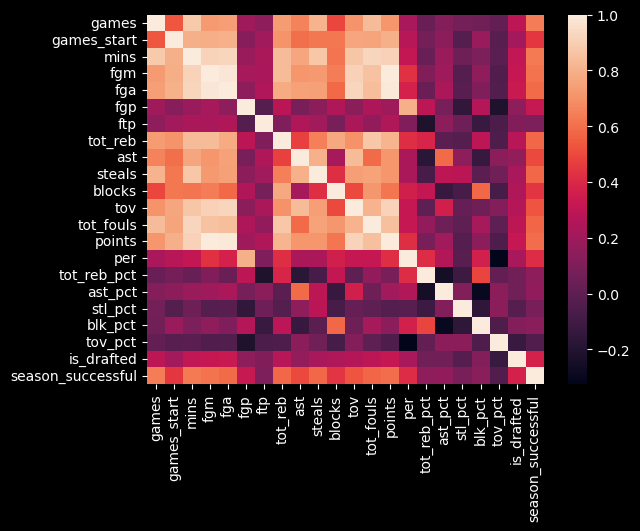

In [381]:
#Making a heat map to help see if there are any correlations
corrs = traindf.corr()
sns.heatmap(corrs)
plt.show()

In [382]:
#Seems like our data isn'too far from each other
traindf.season_successful.value_counts()

1    216
0    142
Name: season_successful, dtype: int64

In [383]:
# Create our train/test set
X = traindf.drop(columns=["season_successful"])
y = traindf["season_successful"]
#Decided to do a stratification even though my classes are not too overproportioned,I would like to have this as precise as possible
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(268, 21) (268,)
(90, 21) (90,)


In [384]:
def doMLClassification(model, X_train, y_train, X_test, y_test):
    # fit the model
    model.fit(X_train, y_train)

    # predict the model
    train_preds = model.predict(X_train)
    test_preds = model.predict(X_test)
    test_proba = model.predict_proba(X_test)[:,1]

    # make some graphs
    print("TRAINING SET METRICS")
    print(confusion_matrix(y_train, train_preds))
    print(classification_report(y_train, train_preds))
    print()
    print("TESTING SET METRICS")
    print(confusion_matrix(y_test, test_preds))
    print(classification_report(y_test, test_preds))

    # ROC Curve
    auc = roc_auc_score(y_test, test_proba)
    fpr, tpr, thresholds = roc_curve(y_test, test_proba)
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(F"AUC: {auc}")
    plt.show()

In [385]:
#Now I will be running different models and determining which model is the most accurate to little to no overfitting

TRAINING SET METRICS
[[ 97   9]
 [  5 157]]
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       106
           1       0.95      0.97      0.96       162

    accuracy                           0.95       268
   macro avg       0.95      0.94      0.95       268
weighted avg       0.95      0.95      0.95       268


TESTING SET METRICS
[[24 12]
 [ 1 53]]
              precision    recall  f1-score   support

           0       0.96      0.67      0.79        36
           1       0.82      0.98      0.89        54

    accuracy                           0.86        90
   macro avg       0.89      0.82      0.84        90
weighted avg       0.87      0.86      0.85        90



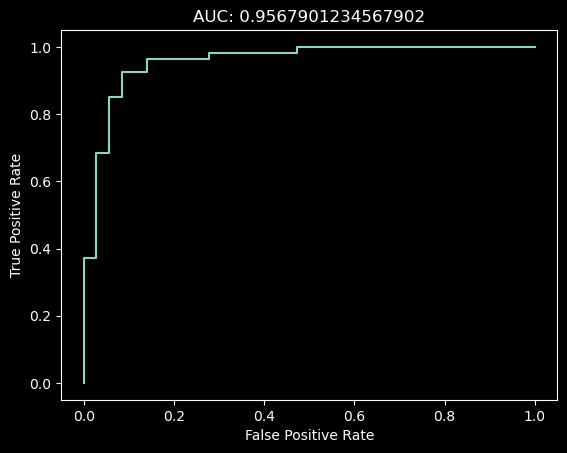

In [386]:
# init the model
lr = LogisticRegression()
doMLClassification(lr, X_train, y_train, X_test, y_test)
#Seems like there is some overfitting with this model 

TRAINING SET METRICS
[[ 79  27]
 [  9 153]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.81       106
           1       0.85      0.94      0.89       162

    accuracy                           0.87       268
   macro avg       0.87      0.84      0.85       268
weighted avg       0.87      0.87      0.86       268


TESTING SET METRICS
[[27  9]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.90      0.75      0.82        36
           1       0.85      0.94      0.89        54

    accuracy                           0.87        90
   macro avg       0.88      0.85      0.86        90
weighted avg       0.87      0.87      0.86        90



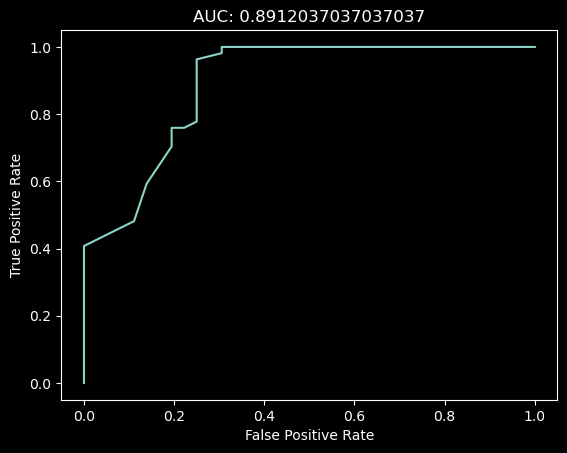

In [387]:
# init the model
knn = KNeighborsClassifier(n_neighbors=25)
doMLClassification(knn, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[106   0]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       162

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268


TESTING SET METRICS
[[32  4]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.93      0.96      0.95        54

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



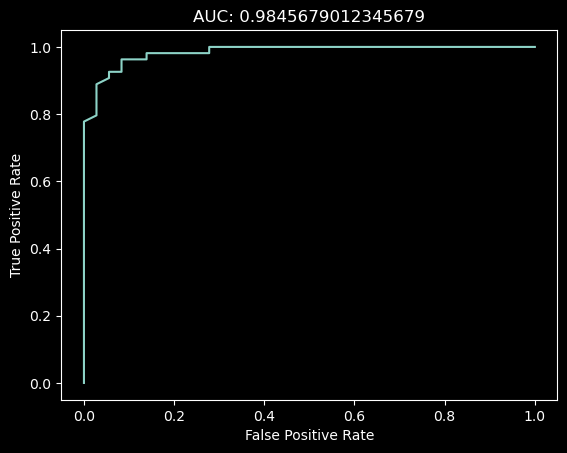

In [388]:
# init the model
#There is MASSIVE overfitting on this model
rf = RandomForestClassifier(random_state=42)
doMLClassification(rf, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[106   0]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       162

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268


TESTING SET METRICS
[[36  0]
 [ 0 54]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       1.00      1.00      1.00        54

    accuracy                           1.00        90
   macro avg       1.00      1.00      1.00        90
weighted avg       1.00      1.00      1.00        90



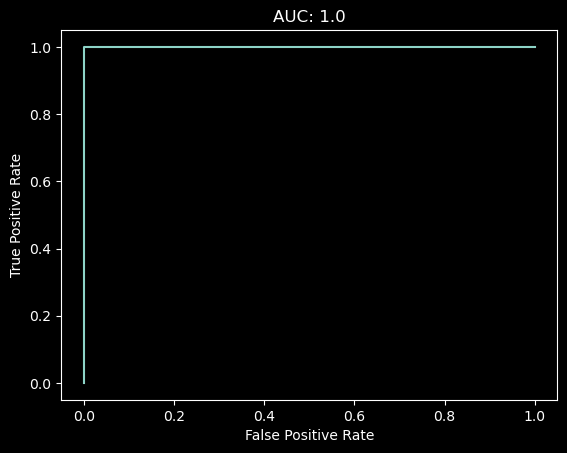

In [389]:
# init the model
#seems this model has some massive overfitting as well
ada = AdaBoostClassifier(random_state=42)
doMLClassification(ada, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[106   0]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       162

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268


TESTING SET METRICS
[[30  6]
 [ 3 51]]
              precision    recall  f1-score   support

           0       0.91      0.83      0.87        36
           1       0.89      0.94      0.92        54

    accuracy                           0.90        90
   macro avg       0.90      0.89      0.89        90
weighted avg       0.90      0.90      0.90        90



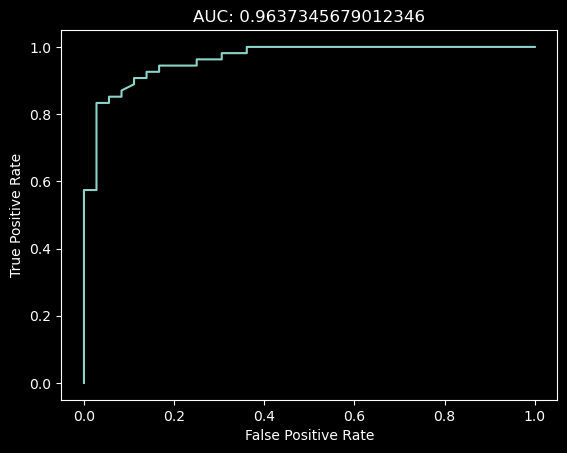

In [390]:
# init the model
et = ExtraTreesClassifier(random_state=42)
doMLClassification(et, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[106   0]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       162

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268


TESTING SET METRICS
[[32  4]
 [ 2 52]]
              precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.93      0.96      0.95        54

    accuracy                           0.93        90
   macro avg       0.93      0.93      0.93        90
weighted avg       0.93      0.93      0.93        90



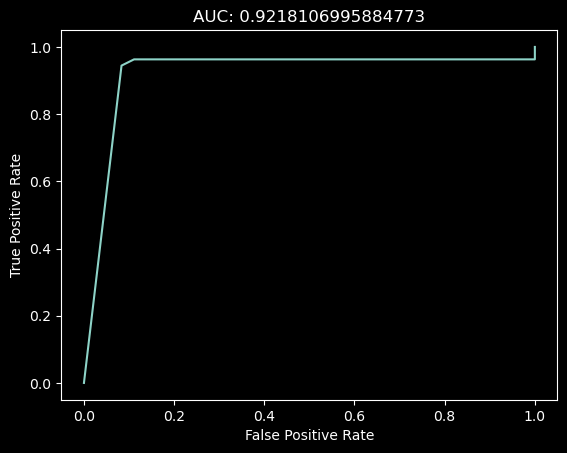

In [391]:
# init the model
gb = GradientBoostingClassifier(random_state=42)
doMLClassification(gb, X_train, y_train, X_test, y_test)

TRAINING SET METRICS
[[106   0]
 [  0 162]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      1.00      1.00       162

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268


TESTING SET METRICS
[[32  4]
 [ 1 53]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        36
           1       0.93      0.98      0.95        54

    accuracy                           0.94        90
   macro avg       0.95      0.94      0.94        90
weighted avg       0.95      0.94      0.94        90



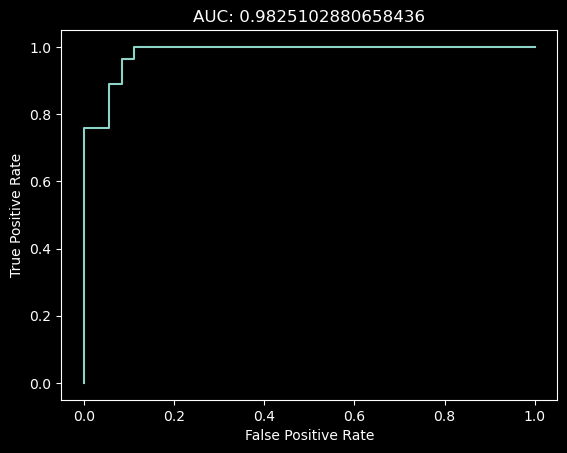

In [392]:
# init the model
xgb = XGBClassifier(random_state=42)
doMLClassification(xgb, X_train, y_train, X_test, y_test)

In [393]:
# init the model
#lgb = LGBMClassifier(random_state=42)
#doMLClassification(lgb, X_train, y_train, X_test, y_test)

#It seems the only reasonable model to go with is Kneighbors
#Commented this one out so it won't flood the screen

In [394]:
#imported pickle to save the model to a disk 
import pickle
filename = 'knn_project.sav'
pickle.dump(knn, open(filename, 'wb'))

In [395]:
#Before using model on DataFrame to predict 2018-2021 seasons
#I'm going to predict Shai Gilgeous-Alexander, Zion Williamson, James Wiseman, and Josh Giddey
X.columns

Index(['games', 'games_start', 'mins', 'fgm', 'fga', 'fgp', 'ftp', 'tot_reb',
       'ast', 'steals', 'blocks', 'tov', 'tot_fouls', 'points', 'per',
       'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',
       'is_drafted'],
      dtype='object')

In [396]:
filename = 'knn_project.sav'
loaded_model = pickle.load(open(filename,'rb'))

In [397]:
#Shai 2019 Season Stats in Order of X column 
Shai = [70,70,2428.0,478.0,1015.0,0.471,0.807,412.0,232.0,79.0,47.0,134.0,117.0,1331.0,17.7,0.094,0.152,0.016,0.017,0.103,1]
loaded_model.predict_proba([Shai])
#Wow, this looks perfect, Shai did have a succesful season but I'm not too confident that this model is accurate enough.

array([[0.04, 0.96]])

In [398]:
r_player = [70,20,2428.0,478.0,1015.0,0.471,0.807,412.0,232.0,79.0,47.0,134.0,117.0,300,10,0.094,0.152,0.016,0.017,0.103,0]
loaded_model.predict_proba([r_player])
# I made our random player equivalent to Shai 2019 stats, however I changed the amount of games started, changed points for the 
# season to 300 instead of 1331, made him undrafted,as well as changed points per game from 17.7 to 10. 
# I think this is pretty accurate due to even though games started is lower, as well as points & points per game, the random
#player has every other stat equivalent to Shai 2019 season. 

array([[0.04, 0.96]])

In [399]:
cols2 = ['nbapersonid','player','games', 'games_start', 'mins', 'fgm', 'fga', 'fgp', 'ftp', 'tot_reb',
       'ast', 'steals', 'blocks', 'tov', 'tot_fouls', 'points', 'per',
       'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct',]
quickdf = cleaned_df.loc[:,cols2]

In [400]:
# Making this function be able to just to make it easier to copy over all stats in order & paste them
def search_player2(df):
    player_name = input("Enter the NBA player name: ")
    filtered_df2 =quickdf[quickdf['player'] == player_name]
    return filtered_df2.head(10)

In [401]:
search_player2(quickdf)

Enter the NBA player name: Zion Williamson


,nbapersonid,player,games,games_start,mins,fgm,fga,fgp,ftp,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct
6943,1629627.0,Zion Williamson,24.0,24.0,668.0,210.0,360.0,0.583,0.640,150.0,50.0,16.0,9.0,59.0,42.0,540.0,24.1,0.119,0.133,0.011,0.011,0.119
7573,1629627.0,Zion Williamson,61.0,61.0,2026.0,634.0,1037.0,0.611,0.698,441.0,226.0,57.0,39.0,167.0,135.0,1647.0,27.1,0.118,0.197,0.013,0.018,0.116


In [402]:
#Zion Williamson 2019 Season
Zion = [24.0,24.0,668.0,210.0,360.0,0.583,0.640,150.0,50.0,16.0,9.0,59.0,42.0,540.0,24.1,0.119,0.133,0.011,0.011,0.119,1]
loaded_model.predict_proba([Zion])

array([[0.08, 0.92]])

In [403]:
# James Wiseman Season 
James = [39.0,27.0,836.0,191.0,368.0,0.519,0.628,226.0,26.0,11.0,36.0,60.0,121.0,448.0,13.1,0.144,0.049,0.006,0.038,0.129,1]
loaded_model.predict_proba([James])

array([[0.04, 0.96]])

In [404]:
# Josh Giddey Season
Josh = [54.0,54.0,1700.0,281.0,670.0,0.419,0.709,421.0,345.0,51.0,20.0,171.0,88.0,674.0,13.3,0.127,0.323,0.015,0.011,0.195,1]
loaded_model.predict_proba([Josh])

array([[0.04, 0.96]])

In [405]:
#now make testing data
testing = (cleaned_df.draftyear >= 2018) 
testdf = cleaned_df.loc[testing]
testdf.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,all_nba_defensive_first_team,all_nba_defensive_second_team,all_nba_first_team,all_nba_second_team,all_nba_third_team,all_rookie_first_team,all_rookie_second_team,bill_russell_nba_finals_mvp,player_of_the_month,player_of_the_week,rookie_of_the_month,all_star_game,rookie_all_star_game,allstar_rk,defensive_player_of_the_year_rk,most_improved_player_rk,most_valuable_player_rk,rookie_of_the_year_rk,sixth_man_of_the_year_rk,all_nba_points_rk,all_rookie_points_rk
5931,1629027.0,Trae Young,2018.0,5.0,2018,1610612737,ATL,81.0,81.0,2503.0,525.0,1256.0,0.418,156.0,482.0,0.324,369.0,774.0,0.477,0.480,343.0,414.0,0.829,64.0,237.0,301.0,653.0,72.0,15.0,308.0,140.0,1549.0,17.0,0.330,0.026,0.102,0.063,0.405,0.013,0.005,0.176,0.284,2.5,0.7,3.3,2.3,-2.8,-0.6,0.9,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,4.0,False,True,17.0,NaN,NaN,NaN,2.0,NaN,NaN,1.0
5932,1629016.0,Omari Spellman,2018.0,30.0,2018,1610612737,ATL,46.0,11.0,805.0,98.0,244.0,0.402,44.0,128.0,0.344,54.0,116.0,0.466,0.492,32.0,45.0,0.711,72.0,122.0,194.0,47.0,26.0,25.0,31.0,67.0,272.0,12.4,0.184,0.092,0.163,0.127,0.080,0.015,0.027,0.105,0.149,0.6,0.5,1.2,-0.5,-0.7,-1.2,0.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5936,1628989.0,Kevin Huerter,2018.0,19.0,2018,1610612737,ATL,75.0,59.0,2048.0,275.0,657.0,0.419,136.0,353.0,0.385,139.0,304.0,0.457,0.522,41.0,56.0,0.732,60.0,185.0,245.0,214.0,65.0,25.0,109.0,155.0,727.0,10.1,0.085,0.030,0.097,0.063,0.145,0.015,0.011,0.138,0.157,0.7,0.7,1.5,-1.6,-0.8,-2.4,-0.2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,NaN,NaN,82.0,NaN,NaN,NaN,NaN,NaN,NaN,10.0
5941,1629168.0,B.J. Johnson,2018.0,NaN,2018,1610612737,ATL,6.0,0.0,43.0,8.0,16.0,0.500,3.0,6.0,0.500,5.0,10.0,0.500,0.594,2.0,2.0,1.000,2.0,6.0,8.0,0.0,2.0,0.0,2.0,3.0,21.0,14.0,0.125,0.048,0.150,0.098,0.000,0.021,0.000,0.106,0.179,0.0,0.0,0.1,-1.5,-1.4,-2.9,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5942,1629168.0,B.J. Johnson,2018.0,NaN,2018,1610612758,SAC,1.0,0.0,6.0,1.0,2.0,0.500,0.0,1.0,0.000,1.0,1.0,1.000,0.500,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.138,0.0,0.0,0.0,-8.4,-5.7,-14.1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [406]:
# Creating testing DataFrame which will be the same steps done as the training DataFrame but just with more Data
testing_cols = 'nbapersonid', 'player', 'draftyear', 'draftpick', 'season','nbateamid', 'team', 'games', 'games_start', 'mins', 'fgm', 'fga','fgp', 'fgm3', 'fga3', 'fgp3', 'fgm2', 'fga2', 'fgp2', 'efg', 'ftm','fta', 'ftp', 'off_reb', 'def_reb', 'tot_reb', 'ast', 'steals','blocks', 'tov', 'tot_fouls', 'points', 'per', 'ftr', 'off_reb_pct','def_reb_pct', 'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct','tov_pct', 'usg', 'ows', 'dws', 'ws', 'obpm', 'dbpm', 'bpm', 'vorp'
testdf = testdf.loc[:,testing_cols]
testdf.head()

,nbapersonid,player,draftyear,draftpick,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp
5931,1629027.0,Trae Young,2018.0,5.0,2018,1610612737,ATL,81.0,81.0,2503.0,525.0,1256.0,0.418,156.0,482.0,0.324,369.0,774.0,0.477,0.480,343.0,414.0,0.829,64.0,237.0,301.0,653.0,72.0,15.0,308.0,140.0,1549.0,17.0,0.330,0.026,0.102,0.063,0.405,0.013,0.005,0.176,0.284,2.5,0.7,3.3,2.3,-2.8,-0.6,0.9
5932,1629016.0,Omari Spellman,2018.0,30.0,2018,1610612737,ATL,46.0,11.0,805.0,98.0,244.0,0.402,44.0,128.0,0.344,54.0,116.0,0.466,0.492,32.0,45.0,0.711,72.0,122.0,194.0,47.0,26.0,25.0,31.0,67.0,272.0,12.4,0.184,0.092,0.163,0.127,0.080,0.015,0.027,0.105,0.149,0.6,0.5,1.2,-0.5,-0.7,-1.2,0.2
5936,1628989.0,Kevin Huerter,2018.0,19.0,2018,1610612737,ATL,75.0,59.0,2048.0,275.0,657.0,0.419,136.0,353.0,0.385,139.0,304.0,0.457,0.522,41.0,56.0,0.732,60.0,185.0,245.0,214.0,65.0,25.0,109.0,155.0,727.0,10.1,0.085,0.030,0.097,0.063,0.145,0.015,0.011,0.138,0.157,0.7,0.7,1.5,-1.6,-0.8,-2.4,-0.2
5941,1629168.0,B.J. Johnson,2018.0,NaN,2018,1610612737,ATL,6.0,0.0,43.0,8.0,16.0,0.500,3.0,6.0,0.500,5.0,10.0,0.500,0.594,2.0,2.0,1.000,2.0,6.0,8.0,0.0,2.0,0.0,2.0,3.0,21.0,14.0,0.125,0.048,0.150,0.098,0.000,0.021,0.000,0.106,0.179,0.0,0.0,0.1,-1.5,-1.4,-2.9,0.0
5942,1629168.0,B.J. Johnson,2018.0,NaN,2018,1610612758,SAC,1.0,0.0,6.0,1.0,2.0,0.500,0.0,1.0,0.000,1.0,1.0,1.000,0.500,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.138,0.0,0.0,0.0,-8.4,-5.7,-14.1,0.0


In [407]:
testdf["is_drafted"] = [1 if pd.notnull(x) else 0 for x in testdf.draftpick]
testdf.drop(columns=["draftpick"], inplace=True)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 5931 to 8477
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nbapersonid  870 non-null    float64
 1   player       870 non-null    object 
 2   draftyear    870 non-null    float64
 3   season       870 non-null    int64  
 4   nbateamid    870 non-null    int32  
 5   team         870 non-null    object 
 6   games        870 non-null    float64
 7   games_start  870 non-null    float64
 8   mins         870 non-null    float64
 9   fgm          870 non-null    float64
 10  fga          870 non-null    float64
 11  fgp          856 non-null    float64
 12  fgm3         870 non-null    float64
 13  fga3         870 non-null    float64
 14  fgp3         787 non-null    float64
 15  fgm2         870 non-null    float64
 16  fga2         870 non-null    float64
 17  fgp2         838 non-null    float64
 18  efg          856 non-null    float64
 19  ftm 

In [408]:
testdf.fgp2.describe()

count    838.000000
mean       0.492801
std        0.166252
min        0.000000
25%        0.432250
50%        0.500000
75%        0.571000
max        1.000000
Name: fgp2, dtype: float64

In [409]:
#Impute all columns nulls with their median number
testdf['fgp'].fillna(0.425000, inplace=True)
testdf['fgp3'].fillna(0.322000, inplace=True)
testdf['efg'].fillna(0.500000, inplace=True)
testdf['ftp'].fillna(0.750000, inplace=True)
testdf['ftr'].fillna(0.217000, inplace=True)
testdf['tov_pct'].fillna(0.117500, inplace=True)
testdf['fgp2'].fillna(0.500000, inplace=True)



testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 5931 to 8477
Data columns (total 49 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   nbapersonid  870 non-null    float64
 1   player       870 non-null    object 
 2   draftyear    870 non-null    float64
 3   season       870 non-null    int64  
 4   nbateamid    870 non-null    int32  
 5   team         870 non-null    object 
 6   games        870 non-null    float64
 7   games_start  870 non-null    float64
 8   mins         870 non-null    float64
 9   fgm          870 non-null    float64
 10  fga          870 non-null    float64
 11  fgp          870 non-null    float64
 12  fgm3         870 non-null    float64
 13  fga3         870 non-null    float64
 14  fgp3         870 non-null    float64
 15  fgm2         870 non-null    float64
 16  fga2         870 non-null    float64
 17  fgp2         870 non-null    float64
 18  efg          870 non-null    float64
 19  ftm 

In [410]:
testdf['season_successful'] = testdf.apply(successful_season, axis=1)
testdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 5931 to 8477
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nbapersonid        870 non-null    float64
 1   player             870 non-null    object 
 2   draftyear          870 non-null    float64
 3   season             870 non-null    int64  
 4   nbateamid          870 non-null    int32  
 5   team               870 non-null    object 
 6   games              870 non-null    float64
 7   games_start        870 non-null    float64
 8   mins               870 non-null    float64
 9   fgm                870 non-null    float64
 10  fga                870 non-null    float64
 11  fgp                870 non-null    float64
 12  fgm3               870 non-null    float64
 13  fga3               870 non-null    float64
 14  fgp3               870 non-null    float64
 15  fgm2               870 non-null    float64
 16  fga2               870

In [411]:
#Dropping ID & Saving them off to a value 
ids_test = testdf.nbapersonid      
testdf.drop(columns=['nbapersonid'], inplace = True)
testdf.head()


,player,draftyear,season,nbateamid,team,games,games_start,mins,fgm,fga,fgp,fgm3,fga3,fgp3,fgm2,fga2,fgp2,efg,ftm,fta,ftp,off_reb,def_reb,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,ftr,off_reb_pct,def_reb_pct,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,usg,ows,dws,ws,obpm,dbpm,bpm,vorp,is_drafted,season_successful
5931,Trae Young,2018.0,2018,1610612737,ATL,81.0,81.0,2503.0,525.0,1256.0,0.418,156.0,482.0,0.324,369.0,774.0,0.477,0.480,343.0,414.0,0.829,64.0,237.0,301.0,653.0,72.0,15.0,308.0,140.0,1549.0,17.0,0.330,0.026,0.102,0.063,0.405,0.013,0.005,0.176,0.284,2.5,0.7,3.3,2.3,-2.8,-0.6,0.9,1,1
5932,Omari Spellman,2018.0,2018,1610612737,ATL,46.0,11.0,805.0,98.0,244.0,0.402,44.0,128.0,0.344,54.0,116.0,0.466,0.492,32.0,45.0,0.711,72.0,122.0,194.0,47.0,26.0,25.0,31.0,67.0,272.0,12.4,0.184,0.092,0.163,0.127,0.080,0.015,0.027,0.105,0.149,0.6,0.5,1.2,-0.5,-0.7,-1.2,0.2,1,1
5936,Kevin Huerter,2018.0,2018,1610612737,ATL,75.0,59.0,2048.0,275.0,657.0,0.419,136.0,353.0,0.385,139.0,304.0,0.457,0.522,41.0,56.0,0.732,60.0,185.0,245.0,214.0,65.0,25.0,109.0,155.0,727.0,10.1,0.085,0.030,0.097,0.063,0.145,0.015,0.011,0.138,0.157,0.7,0.7,1.5,-1.6,-0.8,-2.4,-0.2,1,1
5941,B.J. Johnson,2018.0,2018,1610612737,ATL,6.0,0.0,43.0,8.0,16.0,0.500,3.0,6.0,0.500,5.0,10.0,0.500,0.594,2.0,2.0,1.000,2.0,6.0,8.0,0.0,2.0,0.0,2.0,3.0,21.0,14.0,0.125,0.048,0.150,0.098,0.000,0.021,0.000,0.106,0.179,0.0,0.0,0.1,-1.5,-1.4,-2.9,0.0,0,0
5942,B.J. Johnson,2018.0,2018,1610612758,SAC,1.0,0.0,6.0,1.0,2.0,0.500,0.0,1.0,0.000,1.0,1.0,1.000,0.500,0.0,0.0,0.750,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.7,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.138,0.0,0.0,0.0,-8.4,-5.7,-14.1,0.0,0,0


In [412]:
test_cols = ['games', 'games_start', 'mins', 'fgm', 'fga', 'fgp', 'ftp', 'tot_reb',
       'ast', 'steals', 'blocks', 'tov', 'tot_fouls', 'points', 'per',
       'tot_reb_pct', 'ast_pct', 'stl_pct', 'blk_pct', 'tov_pct', 'is_drafted']
testdf = testdf.loc[:,test_cols]

In [413]:
testdf.head()

,games,games_start,mins,fgm,fga,fgp,ftp,tot_reb,ast,steals,blocks,tov,tot_fouls,points,per,tot_reb_pct,ast_pct,stl_pct,blk_pct,tov_pct,is_drafted
5931,81.0,81.0,2503.0,525.0,1256.0,0.418,0.829,301.0,653.0,72.0,15.0,308.0,140.0,1549.0,17.0,0.063,0.405,0.013,0.005,0.176,1
5932,46.0,11.0,805.0,98.0,244.0,0.402,0.711,194.0,47.0,26.0,25.0,31.0,67.0,272.0,12.4,0.127,0.080,0.015,0.027,0.105,1
5936,75.0,59.0,2048.0,275.0,657.0,0.419,0.732,245.0,214.0,65.0,25.0,109.0,155.0,727.0,10.1,0.063,0.145,0.015,0.011,0.138,1
5941,6.0,0.0,43.0,8.0,16.0,0.500,1.000,8.0,0.0,2.0,0.0,2.0,3.0,21.0,14.0,0.098,0.000,0.021,0.000,0.106,0
5942,1.0,0.0,6.0,1.0,2.0,0.500,0.750,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.7,0.000,0.000,0.000,0.000,0.000,0


In [414]:
knn.predict(testdf)

array([1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,

In [415]:
preds = knn.predict(testdf)

In [416]:
sub = pd.DataFrame()
sub['nbapersonid'] = ids_test
sub['Succesful Season'] = preds
sub.head() 

,nbapersonid,Succesful Season
5931,1629027.0,1
5932,1629016.0,1
5936,1628989.0,1
5941,1629168.0,0
5942,1629168.0,0


In [417]:
sub.head(20)

,nbapersonid,Succesful Season
5931,1629027.0,1
5932,1629016.0,1
5936,1628989.0,1
5941,1629168.0,0
5942,1629168.0,0
5952,1629121.0,1
5968,1629033.0,0
5969,1629058.0,0
5971,1629066.0,1
5984,1629057.0,0


<strong><span style="color:red">Model Overview Section</span></strong> 
## Process :
##### I decided to create a model that predicts whether a player had a successful season or not. Before building the model, the first step is to thoroughly clean the DataFrame. When cleaning a DataFrame in preparation for a model, it's essential to remove all null values. If a column is missing some numerical values, we perform a step called imputation, which involves filling the nulls with the column's median or mean. I also decided to create a new column to help detect whether a player will have a successful season. This column applies a function in which a player must meet certain criteria for their season to be labeled as 'successful.'

##### Once all the necessary preparations were complete, the next step was to perform One Hot Encoding on my categorical column. However, there was an issue; there was significant skew in that column, so I chose to drop it, eliminating the need to convert it into numeric data.

##### The next step was to create different models to determine which one produced the best results with minimal overfitting. After identifying the best model, I saved it and then imported the Pickle library, which allows us to load the saved model. After testing the model on newly drafted players, the results appeared accurate. The next step was to use the model to predict the entire DataFrame's player season outcomes.

## Weaknesses:
##### Building a model takes numerous trials and errors to create an efficient model. There were some weaknesses that I would have focused on more if more time had been given. One weakness I would point out is that determining whether a player had a successful season is a very broad statement. Yes, their season may have been great, but as an analyst, how great was it? My model's perspective on a 'Successful Season' was if a player performed above average. This means a player who was slightly above average and a player who had an elite season with record-breaking numbers were in the same category.

##### I do believe this simplicity can be beneficial for someone who may not want an in-depth analysis. However, as a Data Scientist, our role is to dive deeper. From an outside perspective, I think this model can be good depending on who is looking at it.

##### Another significant weakness in the model is the presence of numerous numeric columns. Having so many numeric columns can be challenging when building a quick model to test. Selecting certain columns can improve the model's accuracy, while others may hinder it. This would require more time to thoroughly test the various outcomes with the columns.

## Part 2 -- Predicting Team Stats  

In this section, we're going to introduce a simple way to predict team offensive rebound percent in the next game and then discuss ways to improve those predictions.  
 
### Question 1   

Using the `rebounding_data` dataset, we'll predict a team's next game's offensive rebounding percent to be their average offensive rebounding percent in all prior games. On a single game level, offensive rebounding percent is the number of offensive rebounds divided by their number offensive rebound "chances" (essentially the team's missed shots). On a multi-game sample, it should be the total number of offensive rebounds divided by the total number of offensive rebound chances.    

Please calculate what OKC's predicted offensive rebound percent is for game 81 in the data. That is, use games 1-80 to predict game 81.  

In [418]:
okc_data = rebound_df[(rebound_df['team'] == 'OKC') & (rebound_df['game_number'] <= 80)]

In [419]:
total_offensive_rebounds = rebound_df['offensive_rebounds'].sum()
total_off_rebound_chances = rebound_df['off_rebound_chances'].sum()

predicted_oreb_pct = total_offensive_rebounds / total_off_rebound_chances
# Prediction for game 81 
predicted_oreb_pct
# The percentage is 28.09% when rounded to two decimal places

0.2808817908364217

<strong><span style="color:red">ANSWER 1:</span></strong>  

28.09%

### Question 2  

There are a few limitations to the method we used above. For example, if a team has a great offensive rebounder who has played in most games this season but will be out due to an injury for the next game, we might reasonably predict a lower team offensive rebound percent for the next game.  

 Please discuss how you would think about changing our original model to better account for missing players. You do not have to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  

<strong><span style="color:red">ANSWER 2:</span></strong> 
##### Due to not accounting for individual players playing for a certain game it causes our data to be hard to predict future outcomes, with a dataset that's constantly updated of the team roster, there is numerous ways of making predictions. Such as making a ML model, as well as merging a dataset that has the currently updated roster with the stats of each player for each indiviual game, next would be if the player is not playing due to injury or other circumstances do not take his stats into account when getting the average offensive rebound of the team for that game. 

### Question 3  

In question 2, you saw and discussed how to deal with one weakness of the model. For this question, please write about 1-3 other potential weaknesses of the simple average model you made in question 1 and discuss how you would deal with each of them. You may either explain a weakness and discuss how you'd fix that weakness, then move onto the next issue, or you can start by explaining multiple weaknesses with the original approach and discuss one overall modeling methodology you'd use that gets around most or all of them. Again, you do not need to write any code or implement any changes, and you can assume you have access to any reasonable data that isn't provided in this project. Try to be clear and concise with your answer.  


<strong><span style="color:red">ANSWER 3:</span></strong> 

### Limited Functionality:

#### Weakness: The simple average model only performs one specific calculation, which is converting a decimal number to a percentage. It cannot handle more complex percentage-related tasks, such as percentage increase, decrease, or finding percentages of other numbers.
#### Solution: To address this limitation, you would need to develop a more comprehensive percentage calculator that can handle a wide range of percentage-related calculations. This would involve creating a program or script that takes user input and offers various options for performing different percentage calculations.

### Lack of Error Handling:

#### Weakness: The simple average model does not include error handling mechanisms. If a user enters invalid input or tries to divide by zero, the model may produce unexpected results or errors.
#### Solution: Implement robust error handling in the model to validate user input and prevent common errors. For example, you can check for valid numeric input, handle division by zero gracefully, and provide clear error messages to guide users when they make mistakes.